In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

import statsmodels.formula.api as smf
import statsmodels.tools.eval_measures as m
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [2]:
Data=pd.read_csv("../../../../data/stage_1/superset.csv")
Hosp=pd.read_csv("../../../../data/stage_3/COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State.csv")
Data['Date']=Data['Date'].astype('datetime64[ns]')

Selected texas as state of choice to plot linear and non linear regression models

In [3]:
texas=Data[Data['State']=='TX']

In [4]:
texas['new_cases']=texas['Cases'].diff()
texas['new_deaths']=texas['Deaths'].diff()

<ipython-input-4-e8192177c1cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas['new_cases']=texas['Cases'].diff()
<ipython-input-4-e8192177c1cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas['new_deaths']=texas['Deaths'].diff()


Removing all data untill the first case

In [5]:
 texas=texas[texas['Cases']>0]

In [6]:
texas=texas.groupby(['Date']).sum().reset_index()

In [7]:
texas

,Date,countyFIPS,StateFIPS,population,Deaths,Cases,new_cases,new_deaths
0,2020-03-05,96358,96,5525013,0,3,3.0,0.0
1,2020-03-06,96358,96,5525013,0,4,1.0,0.0
2,2020-03-07,96358,96,5525013,0,8,4.0,0.0
3,2020-03-08,96358,96,5525013,0,11,3.0,0.0
4,2020-03-09,192626,192,6683688,0,16,5.0,0.0
...,...,...,...,...,...,...,...,...
525,2021-08-12,12256516,12192,28995881,52768,3278469,15186.0,120.0
526,2021-08-13,12256516,12192,28995881,52912,3292180,13711.0,144.0
527,2021-08-14,12256516,12192,28995881,53029,3318801,26621.0,117.0
528,2021-08-15,12256516,12192,28995881,53072,3323973,5172.0,43.0


Removing first case date which is 2020-03-05

In [8]:
texas=texas[texas['Date']!='2020-03-05']

In [9]:
texas=texas[texas['new_cases']<100000]

In [10]:
l=[]
for i in range(0,len(texas)):
    day=i+1
    l.append(day)

In [11]:
texas['Number_days_Day1']=l

Making negative cases as 0

In [12]:
texas['new_cases'][texas['new_cases']<0]=0

<ipython-input-12-5f90ac8a59a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas['new_cases'][texas['new_cases']<0]=0


In [13]:
cases=texas[['new_cases','Number_days_Day1']]

In [14]:
lm = smf.ols(formula='new_cases~Number_days_Day1', data=cases).fit()

In [15]:
pred=lm.predict(cases.Number_days_Day1)

In [16]:
pred

1      3948.600763
2      3956.350061
3      3964.099359
4      3971.848656
5      3979.597954
          ...     
525    7993.734115
526    8001.483412
527    8009.232710
528    8016.982007
529    8024.731305
Length: 527, dtype: float64

In [17]:
x_new=pd.DataFrame({'Number_days_Day1':[528,529,530,531,532,533,534]})
x_new

,Number_days_Day1
0,528
1,529
2,530
3,531
4,532
5,533
6,534


In [18]:
pred_next=lm.predict(x_new.Number_days_Day1)
pred_next

0    8032.480603
1    8040.229900
2    8047.979198
3    8055.728495
4    8063.477793
5    8071.227091
6    8078.976388
dtype: float64

In [19]:
lm.params

Intercept           3940.851466
Number_days_Day1       7.749298
dtype: float64

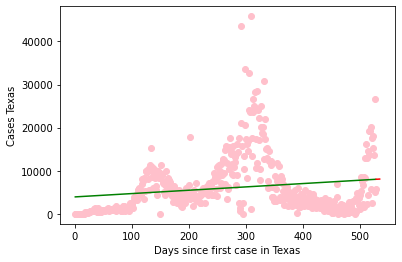

In [20]:
plt.scatter(cases.Number_days_Day1,cases.new_cases,color='pink')
plt.plot(cases.Number_days_Day1,pred,color='green')
plt.plot(x_new.Number_days_Day1,pred_next,color='red')
plt.xlabel('Days since first case in Texas')
plt.ylabel('Cases Texas')
plt.show()


In [21]:
lm.rsquared

0.033987007979592976

In [22]:
m.rmse(cases.new_cases,pred)

6285.163319965722

In [23]:
lm.pvalues

Intercept           2.509642e-12
Number_days_Day1    2.056526e-05
dtype: float64

In [24]:
lm.conf_int()

,0,1
Intercept,2861.567501,5020.135430
Number_days_Day1,4.207138,11.291457


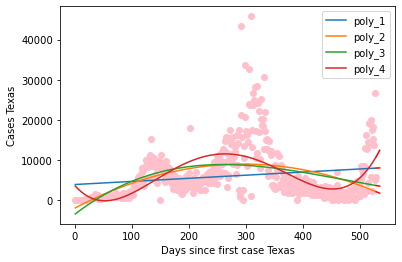

In [233]:
plt.scatter(cases.Number_days_Day1,cases.new_cases,color='pink')
poly1=smf.ols(formula='new_cases ~ 1+Number_days_Day1',data=cases).fit()

plt.plot(cases.Number_days_Day1,poly1.predict(cases.Number_days_Day1),label='poly_1')
plt.plot(x_new.Number_days_Day1,poly1.predict(x_new.Number_days_Day1),color='red')

poly2=smf.ols(formula='new_cases ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)',data=cases).fit()

plt.plot(cases.Number_days_Day1,poly2.predict(cases.Number_days_Day1),label='poly_2')
plt.plot(x_new.Number_days_Day1,poly2.predict(x_new.Number_days_Day1),color='red')

poly3=smf.ols(formula='new_cases ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)+I(Number_days_Day1**3.0)',data=cases).fit()

plt.plot(cases.Number_days_Day1,poly3.predict(cases.Number_days_Day1),label='poly_3')
plt.plot(x_new.Number_days_Day1,poly3.predict(x_new.Number_days_Day1),color='red')

poly4=smf.ols(formula='new_cases ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)+I(Number_days_Day1**3.0)+I(Number_days_Day1**4.0)',data=cases).fit()

plt.plot(cases.Number_days_Day1,poly4.predict(cases.Number_days_Day1),label='poly_4')
plt.plot(x_new.Number_days_Day1,poly4.predict(x_new.Number_days_Day1),color='red')
plt.xlabel('Days since first case Texas')
plt.ylabel('Cases Texas')

plt.legend()

In [26]:
print('poly1_rsquared',poly1.rsquared)
print('poly2_rsquared',poly2.rsquared)
print('poly3_rsquared',poly3.rsquared)
print('poly4_rsquared',poly4.rsquared)
print('poly1_pvalues',poly1.pvalues)
print('poly2_pvalues',poly2.pvalues)
print('poly3_pvalues',poly3.pvalues)
print('poly4_pvalues',poly4.pvalues)

poly1_rsquared 0.033987007979592976
poly2_rsquared 0.20155552277206923
poly3_rsquared 0.2096299044589952
poly4_rsquared 0.3454551664698229
poly1_pvalues Intercept           2.509642e-12
Number_days_Day1    2.056526e-05
dtype: float64
poly2_pvalues Intercept                     9.902480e-03
Number_days_Day1              8.817025e-27
I(Number_days_Day1 ** 2.0)    1.742581e-23
dtype: float64
poly3_pvalues Intercept                     5.463514e-04
Number_days_Day1              6.932709e-11
I(Number_days_Day1 ** 2.0)    6.379233e-05
I(Number_days_Day1 ** 3.0)    2.119411e-02
dtype: float64
poly4_pvalues Intercept                     1.228154e-03
Number_days_Day1              1.132943e-07
I(Number_days_Day1 ** 2.0)    3.880245e-17
I(Number_days_Day1 ** 3.0)    1.076893e-21
I(Number_days_Day1 ** 4.0)    3.530515e-23
dtype: float64


In [27]:
print('ploy1_rmse',m.rmse(cases.new_cases,poly1.predict(cases.Number_days_Day1)))
print('ploy2_rmse',m.rmse(cases.new_cases,poly2.predict(cases.Number_days_Day1)))
print('ploy3_rmse',m.rmse(cases.new_cases,poly3.predict(cases.Number_days_Day1)))
print('ploy4_rmse',m.rmse(cases.new_cases,poly4.predict(cases.Number_days_Day1)))

ploy1_rmse 6285.163319965722
ploy2_rmse 5714.09483924307
ploy3_rmse 5685.1291307389965
ploy4_rmse 5173.623054832854


In [28]:
poly1.conf_int()

,0,1
Intercept,2861.567501,5020.135430
Number_days_Day1,4.207138,11.291457


In [29]:
poly2.conf_int()

,0,1
Intercept,-3422.684500,-469.193274
Number_days_Day1,61.601538,87.434834
I(Number_days_Day1 ** 2.0),-0.150146,-0.102767


In [30]:
poly3.conf_int()

,0,1
Intercept,-5451.084647,-1516.205106
Number_days_Day1,77.061939,141.540671
I(Number_days_Day1 ** 2.0),-0.432808,-0.149178
I(Number_days_Day1 ** 3.0),0.000031,0.000384


In [31]:
poly4.conf_int()

,0,1
Intercept,1472.251095,5971.904002
Number_days_Day1,-220.258213,-102.410840
I(Number_days_Day1 ** 2.0),1.557251,2.463678
I(Number_days_Day1 ** 3.0),-0.007857,-0.005279
I(Number_days_Day1 ** 4.0),0.000005,0.000008


For texas ploy 4 is best fit as r^2 is more<br/>
Confidence interval for texas cases

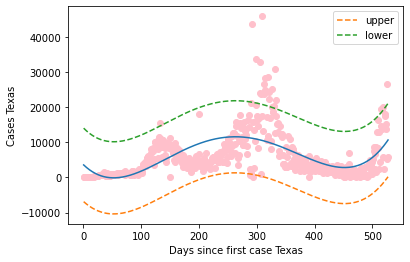

In [234]:
_,upper,lower=wls_prediction_std(poly4)
plt.scatter(cases.Number_days_Day1,cases.new_cases,color='pink')
plt.plot(cases.Number_days_Day1,poly4.predict(cases.Number_days_Day1))
plt.plot(cases.Number_days_Day1,upper,'--',label='upper')
plt.plot(cases.Number_days_Day1,lower,'--',label='lower')
plt.xlabel('Days since first case Texas')
plt.ylabel('Cases Texas')
plt.legend()

Deaths Texas

In [33]:
deaths=texas[['new_deaths','Number_days_Day1']]
lm_d = smf.ols(formula='new_deaths~Number_days_Day1', data=deaths).fit()
pred_deaths=lm_d.predict(deaths.Number_days_Day1)

In [34]:
pred_deaths

1       84.235725
2       84.298249
3       84.360772
4       84.423295
5       84.485818
          ...    
525    116.872816
526    116.935339
527    116.997862
528    117.060385
529    117.122908
Length: 527, dtype: float64

In [35]:
lm_d.params

Intercept           84.173202
Number_days_Day1     0.062523
dtype: float64

In [36]:
x_new_deaths=pd.DataFrame({'Number_days_Day1':[528,529,530,531,532,533,534]})
pred_next_deaths=lm_d.predict(x_new_deaths.Number_days_Day1)

In [37]:
pred_next_deaths

0    117.185432
1    117.247955
2    117.310478
3    117.373001
4    117.435524
5    117.498047
6    117.560571
dtype: float64

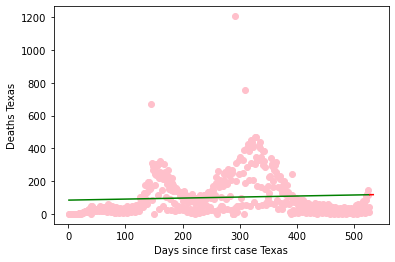

In [235]:
plt.scatter(deaths.Number_days_Day1,deaths.new_deaths,color='pink')
plt.plot(deaths.Number_days_Day1,pred_deaths,color='green')
plt.plot(x_new_deaths.Number_days_Day1,pred_next_deaths,color='red')
plt.xlabel('Days since first case Texas')
plt.ylabel('Deaths Texas')
plt.show()


In [39]:
lm_d.rsquared

0.006287168364864537

In [40]:
m.rmse(deaths.new_deaths,pred_deaths)

119.58123795200717

In [41]:
lm_d.pvalues

Intercept           5.464395e-15
Number_days_Day1    6.894197e-02
dtype: float64

In [42]:
lm_d.conf_int()

,0,1
Intercept,63.638793,104.707611
Number_days_Day1,-0.004870,0.129916


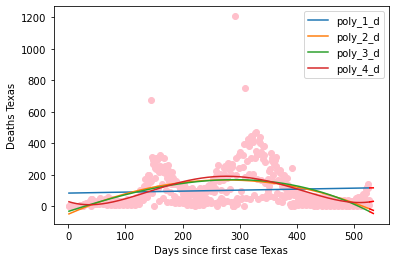

In [236]:
plt.scatter(deaths.Number_days_Day1,deaths.new_deaths,color='pink')
poly1_d=smf.ols(formula='new_deaths ~ 1+Number_days_Day1',data=deaths).fit()

plt.plot(deaths.Number_days_Day1,poly1_d.predict(deaths.Number_days_Day1),label='poly_1_d')
plt.plot(x_new_deaths.Number_days_Day1,poly1_d.predict(x_new_deaths.Number_days_Day1),color='red')

poly2_d=smf.ols(formula='new_deaths ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)',data=deaths).fit()

plt.plot(deaths.Number_days_Day1,poly2_d.predict(deaths.Number_days_Day1),label='poly_2_d')
plt.plot(x_new_deaths.Number_days_Day1,poly2_d.predict(x_new_deaths.Number_days_Day1),color='red')

poly3_d=smf.ols(formula='new_deaths ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)+I(Number_days_Day1**3.0)',data=deaths).fit()

plt.plot(deaths.Number_days_Day1,poly3_d.predict(deaths.Number_days_Day1),label='poly_3_d')
plt.plot(x_new_deaths.Number_days_Day1,poly3_d.predict(x_new_deaths.Number_days_Day1),color='red')

poly4_d=smf.ols(formula='new_deaths ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)+I(Number_days_Day1**3.0)+I(Number_days_Day1**4.0)',data=deaths).fit()

plt.plot(deaths.Number_days_Day1,poly4_d.predict(deaths.Number_days_Day1),label='poly_4_d')
plt.plot(x_new_deaths.Number_days_Day1,poly4_d.predict(x_new_deaths.Number_days_Day1),color='red')

plt.xlabel('Days since first case Texas')
plt.ylabel('Deaths Texas')
plt.legend()

In [44]:
print('poly1_d_rsquared',poly1_d.rsquared)
print('poly2_d_rsquared',poly2_d.rsquared)
print('poly3_d_rsquared',poly3_d.rsquared)
print('poly4_d_rsquared',poly4_d.rsquared)
print('poly1_d_pvalues',poly1_d.pvalues)
print('poly2_d_pvalues',poly2_d.pvalues)
print('poly3_d_pvalues',poly3_d.pvalues)
print('poly4_d_pvalues',poly4_d.pvalues)

poly1_d_rsquared 0.006287168364864537
poly2_d_rsquared 0.2517671778479941
poly3_d_rsquared 0.2547422463062117
poly4_d_rsquared 0.2836154186552464
poly1_d_pvalues Intercept           5.464395e-15
Number_days_Day1    6.894197e-02
dtype: float64
poly2_d_pvalues Intercept                     3.170139e-04
Number_days_Day1              1.225530e-34
I(Number_days_Day1 ** 2.0)    3.618119e-34
dtype: float64
poly3_d_pvalues Intercept                     0.080221
Number_days_Day1              0.000087
I(Number_days_Day1 ** 2.0)    0.448388
I(Number_days_Day1 ** 3.0)    0.149077
dtype: float64
poly4_d_pvalues Intercept                     0.177539
Number_days_Day1              0.049625
I(Number_days_Day1 ** 2.0)    0.000035
I(Number_days_Day1 ** 3.0)    0.000003
I(Number_days_Day1 ** 4.0)    0.000006
dtype: float64


In [45]:
print('poly1_d_rmse',m.rmse(deaths.new_deaths,poly1_d.predict(deaths.Number_days_Day1)))
print('poly2_d_rmse',m.rmse(deaths.new_deaths,poly2_d.predict(deaths.Number_days_Day1)))
print('poly3_d_rmse',m.rmse(deaths.new_deaths,poly3_d.predict(deaths.Number_days_Day1)))
print('poly4_d_rmse',m.rmse(deaths.new_deaths,poly4_d.predict(deaths.Number_days_Day1)))

poly1_d_rmse 119.58123795200717
poly2_d_rmse 103.76501991333178
poly3_d_rmse 103.55852301436283
poly4_d_rmse 101.53264761080993


In [46]:
poly1_d.conf_int()

,0,1
Intercept,63.638793,104.707611
Number_days_Day1,-0.004870,0.129916


In [47]:
poly2_d.conf_int()

,0,1
Intercept,-76.302655,-22.668775
Number_days_Day1,1.343944,1.813063
I(Number_days_Day1 ** 2.0),-0.003301,-0.002441


In [48]:
poly3_d.conf_int()

,0,1
Intercept,-67.814441,3.862086e+00
Number_days_Day1,0.595173,1.769697e+00
I(Number_days_Day1 ** 2.0),-0.003581,1.585624e-03
I(Number_days_Day1 ** 3.0),-0.000006,8.506438e-07


In [49]:
poly4_d.conf_int()

,0,1
Intercept,-1.380706e+01,7.449889e+01
Number_days_Day1,-2.314667e+00,-1.905810e-03
I(Number_days_Day1 ** 2.0),1.001327e-02,2.780195e-02
I(Number_days_Day1 ** 3.0),-8.627052e-05,-3.567319e-05
I(Number_days_Day1 ** 4.0),3.172848e-08,7.926824e-08


Poly4 is best fit for deaths<br/>
Confidence interval for deaths

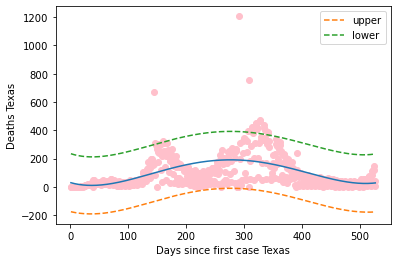

In [241]:
_,upper,lower=wls_prediction_std(poly4_d)
plt.scatter(deaths.Number_days_Day1,deaths.new_deaths,color='pink')
plt.plot(deaths.Number_days_Day1,poly4_d.predict(deaths.Number_days_Day1))
plt.plot(deaths.Number_days_Day1,upper,'--',label='upper')
plt.plot(deaths.Number_days_Day1,lower,'--',label='lower')
plt.xlabel('Days since first case Texas')
plt.ylabel('Deaths Texas')
plt.legend()

Texas data county wise

In [51]:
texas_county=Data[Data['State']=='TX']
texas_county=texas_county.sort_values(by=['countyFIPS', 'Date'])

In [52]:
texas_county

,Date,countyFIPS,State,County Name,StateFIPS,population,Deaths,Cases
1445679,2020-01-22,48001,TX,Anderson County,48,57735,0,0
1445680,2020-01-23,48001,TX,Anderson County,48,57735,0,0
1445681,2020-01-24,48001,TX,Anderson County,48,57735,0,0
1445682,2020-01-25,48001,TX,Anderson County,48,57735,0,0
1445683,2020-01-26,48001,TX,Anderson County,48,57735,0,0
...,...,...,...,...,...,...,...,...
1591216,2021-08-12,48507,TX,Zavala County,48,11840,43,2010
1591217,2021-08-13,48507,TX,Zavala County,48,11840,43,2025
1591218,2021-08-14,48507,TX,Zavala County,48,11840,43,2041
1591219,2021-08-15,48507,TX,Zavala County,48,11840,43,2041


County wise top 5 using the counties with highest case rate that calculated during stage 2

Dimmit County ,Crockett County ,Concho County ,Hansford County ,Floyd County

Floyd County

In [53]:
texas_county_F=texas_county[texas_county['County Name']=='Floyd County ']
texas_county_F

,Date,countyFIPS,State,County Name,StateFIPS,population,Deaths,Cases
1489227,2020-01-22,48153,TX,Floyd County,48,5712,0,0
1489228,2020-01-23,48153,TX,Floyd County,48,5712,0,0
1489229,2020-01-24,48153,TX,Floyd County,48,5712,0,0
1489230,2020-01-25,48153,TX,Floyd County,48,5712,0,0
1489231,2020-01-26,48153,TX,Floyd County,48,5712,0,0
...,...,...,...,...,...,...,...,...
1489795,2021-08-12,48153,TX,Floyd County,48,5712,30,969
1489796,2021-08-13,48153,TX,Floyd County,48,5712,30,969
1489797,2021-08-14,48153,TX,Floyd County,48,5712,30,972
1489798,2021-08-15,48153,TX,Floyd County,48,5712,30,972


Removing all data untill the first case

In [54]:
texas_county_F=texas_county_F[texas_county_F['Cases']>0]
texas_county_F['new_cases']=texas_county_F['Cases'].diff()
texas_county_F['new_deaths']=texas_county_F['Deaths'].diff()
texas_county_F

<ipython-input-54-46f5e5b91dfa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_county_F['new_cases']=texas_county_F['Cases'].diff()
<ipython-input-54-46f5e5b91dfa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_county_F['new_deaths']=texas_county_F['Deaths'].diff()


,Date,countyFIPS,State,County Name,StateFIPS,population,Deaths,Cases,new_cases,new_deaths
1489304,2020-04-08,48153,TX,Floyd County,48,5712,0,1,NaN,NaN
1489305,2020-04-09,48153,TX,Floyd County,48,5712,0,1,0.0,0.0
1489306,2020-04-10,48153,TX,Floyd County,48,5712,0,1,0.0,0.0
1489307,2020-04-11,48153,TX,Floyd County,48,5712,0,1,0.0,0.0
1489308,2020-04-12,48153,TX,Floyd County,48,5712,0,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1489795,2021-08-12,48153,TX,Floyd County,48,5712,30,969,6.0,0.0
1489796,2021-08-13,48153,TX,Floyd County,48,5712,30,969,0.0,0.0
1489797,2021-08-14,48153,TX,Floyd County,48,5712,30,972,3.0,0.0
1489798,2021-08-15,48153,TX,Floyd County,48,5712,30,972,0.0,0.0


In [55]:
#normalizing to 100000
texas_county_F['new_cases']=round((texas_county_F['new_cases']/texas_county_F['population'])*100000,0)
texas_county_F['new_deaths']=round((texas_county_F['new_deaths']/texas_county_F['population'])*100000,0)
texas_county_F

<ipython-input-55-82de225fb9ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_county_F['new_cases']=round((texas_county_F['new_cases']/texas_county_F['population'])*100000,0)
<ipython-input-55-82de225fb9ab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_county_F['new_deaths']=round((texas_county_F['new_deaths']/texas_county_F['population'])*100000,0)


,Date,countyFIPS,State,County Name,StateFIPS,population,Deaths,Cases,new_cases,new_deaths
1489304,2020-04-08,48153,TX,Floyd County,48,5712,0,1,NaN,NaN
1489305,2020-04-09,48153,TX,Floyd County,48,5712,0,1,0.0,0.0
1489306,2020-04-10,48153,TX,Floyd County,48,5712,0,1,0.0,0.0
1489307,2020-04-11,48153,TX,Floyd County,48,5712,0,1,0.0,0.0
1489308,2020-04-12,48153,TX,Floyd County,48,5712,0,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1489795,2021-08-12,48153,TX,Floyd County,48,5712,30,969,105.0,0.0
1489796,2021-08-13,48153,TX,Floyd County,48,5712,30,969,0.0,0.0
1489797,2021-08-14,48153,TX,Floyd County,48,5712,30,972,53.0,0.0
1489798,2021-08-15,48153,TX,Floyd County,48,5712,30,972,0.0,0.0


Removing first case date which is 2020-04-08

In [56]:
#removing outlier 
texas_county_F=texas_county_F[texas_county_F['new_cases']<4000]
texas_county_F=texas_county_F[texas_county_F['Date']!='2020-04-08']
l=[]
for i in range(0,len(texas_county_F)):
    day=i+1
    l.append(day)
texas_county_F['Number_days_Day1']=l

Making negative values as 0

In [57]:
texas_county_F['new_cases'][texas_county_F['new_cases']<0]=0
texas_county_F['new_deaths'][texas_county_F['new_deaths']<0]=0
texas_county_F

<ipython-input-57-764c776f691a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_county_F['new_cases'][texas_county_F['new_cases']<0]=0
<ipython-input-57-764c776f691a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_county_F['new_deaths'][texas_county_F['new_deaths']<0]=0


,Date,countyFIPS,State,County Name,StateFIPS,population,Deaths,Cases,new_cases,new_deaths,Number_days_Day1
1489305,2020-04-09,48153,TX,Floyd County,48,5712,0,1,0.0,0.0,1
1489306,2020-04-10,48153,TX,Floyd County,48,5712,0,1,0.0,0.0,2
1489307,2020-04-11,48153,TX,Floyd County,48,5712,0,1,0.0,0.0,3
1489308,2020-04-12,48153,TX,Floyd County,48,5712,0,1,0.0,0.0,4
1489309,2020-04-13,48153,TX,Floyd County,48,5712,0,1,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...
1489795,2021-08-12,48153,TX,Floyd County,48,5712,30,969,105.0,0.0,489
1489796,2021-08-13,48153,TX,Floyd County,48,5712,30,969,0.0,0.0,490
1489797,2021-08-14,48153,TX,Floyd County,48,5712,30,972,53.0,0.0,491
1489798,2021-08-15,48153,TX,Floyd County,48,5712,30,972,0.0,0.0,492


In [58]:
cases_F=texas_county_F[['new_cases','Number_days_Day1']]
lm_F = smf.ols(formula='new_cases~Number_days_Day1', data=cases_F).fit()
pred_F=lm_F.predict(cases_F.Number_days_Day1)
cases_F

,new_cases,Number_days_Day1
1489305,0.0,1
1489306,0.0,2
1489307,0.0,3
1489308,0.0,4
1489309,0.0,5
...,...,...
1489795,105.0,489
1489796,0.0,490
1489797,53.0,491
1489798,0.0,492


In [59]:
x_new_F=pd.DataFrame({'Number_days_Day1':[494,495,496,497,498,499,500]})
pred_next_F=lm_F.predict(x_new_F.Number_days_Day1)
pred_next_F

0    36.252783
1    36.298801
2    36.344818
3    36.390836
4    36.436854
5    36.482871
6    36.528889
dtype: float64

In [60]:
lm_F.params

Intercept           13.520037
Number_days_Day1     0.046018
dtype: float64

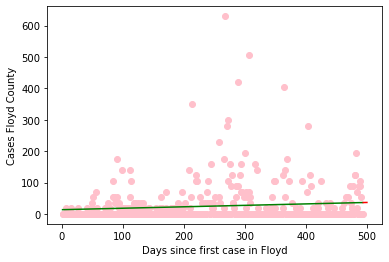

In [61]:
plt.scatter(cases_F.Number_days_Day1,cases_F.new_cases,color='pink')
plt.plot(cases_F.Number_days_Day1,pred_F,color='green')
plt.plot(x_new_F.Number_days_Day1,pred_next_F,color='red')
plt.xlabel('Days since first case in Floyd')
plt.ylabel('Cases Floyd County')
plt.show()


In [62]:
lm_F.rsquared

0.01096109334920603

In [63]:
m.rmse(cases_F.new_cases,pred_F)

62.209986636037776

In [64]:
lm_F.pvalues

Intercept           0.016578
Number_days_Day1    0.020066
dtype: float64

In [65]:
lm_F.conf_int()

,0,1
Intercept,2.470849,24.569224
Number_days_Day1,0.007258,0.084778


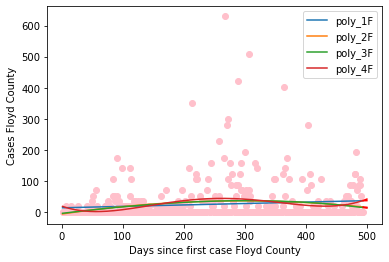

In [244]:
plt.scatter(cases_F.Number_days_Day1,cases_F.new_cases,color='pink')
poly1F=smf.ols(formula='new_cases ~ 1+Number_days_Day1',data=cases_F).fit()

plt.plot(cases_F.Number_days_Day1,poly1F.predict(cases_F.Number_days_Day1),label='poly_1F')
plt.plot(x_new_F.Number_days_Day1,poly1F.predict(x_new_F.Number_days_Day1),color='red')

poly2F=smf.ols(formula='new_cases ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)',data=cases_F).fit()

plt.plot(cases_F.Number_days_Day1,poly2F.predict(cases_F.Number_days_Day1),label='poly_2F')
plt.plot(x_new_F.Number_days_Day1,poly2F.predict(x_new_F.Number_days_Day1),color='red')

poly3F=smf.ols(formula='new_cases ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)+I(Number_days_Day1**3.0)',data=cases_F).fit()

plt.plot(cases_F.Number_days_Day1,poly3F.predict(cases_F.Number_days_Day1),label='poly_3F')
plt.plot(x_new_F.Number_days_Day1,poly3F.predict(x_new_F.Number_days_Day1),color='red')

poly4F=smf.ols(formula='new_cases ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)+I(Number_days_Day1**3.0)+I(Number_days_Day1**4.0)',data=cases_F).fit()

plt.plot(cases_F.Number_days_Day1,poly4F.predict(cases_F.Number_days_Day1),label='poly_4F')
plt.plot(x_new_F.Number_days_Day1,poly4F.predict(x_new_F.Number_days_Day1),color='red')

plt.xlabel('Days since first case Floyd County')
plt.ylabel('Cases Floyd County')
plt.legend()

In [67]:
print('poly1F_rsquared',poly1F.rsquared)
print('poly2F_rsquared',poly2F.rsquared)
print('poly3F_rsquared',poly3F.rsquared)
print('poly4F_rsquared',poly4F.rsquared)
print('poly1F_pvalues',poly1F.pvalues)
print('poly2F_pvalues',poly2F.pvalues)
print('poly3F_pvalues',poly3F.pvalues)
print('poly4F_pvalues',poly4F.pvalues)

poly1F_rsquared 0.01096109334920603
poly2F_rsquared 0.031144809399059836
poly3F_rsquared 0.031301463442551136
poly4F_rsquared 0.04578359548572786
poly1F_pvalues Intercept           0.016578
Number_days_Day1    0.020066
dtype: float64
poly2F_pvalues Intercept                     0.440142
Number_days_Day1              0.000258
I(Number_days_Day1 ** 2.0)    0.001489
dtype: float64
poly3F_pvalues Intercept                     0.696719
Number_days_Day1              0.227098
I(Number_days_Day1 ** 2.0)    0.799874
I(Number_days_Day1 ** 3.0)    0.778668
dtype: float64
poly4F_pvalues Intercept                     0.182984
Number_days_Day1              0.080228
I(Number_days_Day1 ** 2.0)    0.011528
I(Number_days_Day1 ** 3.0)    0.006455
I(Number_days_Day1 ** 4.0)    0.006732
dtype: float64


In [68]:
print('ploy1F_rmse',m.rmse(cases_F.new_cases,poly1F.predict(cases_F.Number_days_Day1)))
print('ploy2F_rmse',m.rmse(cases_F.new_cases,poly2F.predict(cases_F.Number_days_Day1)))
print('ploy3F_rmse',m.rmse(cases_F.new_cases,poly3F.predict(cases_F.Number_days_Day1)))
print('ploy4F_rmse',m.rmse(cases_F.new_cases,poly4F.predict(cases_F.Number_days_Day1)))

ploy1F_rmse 62.209986636037776
ploy2F_rmse 61.57194250113056
ploy3F_rmse 61.56696452104741
ploy4F_rmse 61.10501558905709


In [69]:
poly1F.conf_int()

,0,1
Intercept,2.470849,24.569224
Number_days_Day1,0.007258,0.084778


In [70]:
poly2F.conf_int()

,0,1
Intercept,-22.935511,9.989235
Number_days_Day1,0.134459,0.442260
I(Number_days_Day1 ** 2.0),-0.000792,-0.000189


In [71]:
poly3F.conf_int()

,0,1
Intercept,-26.425359,17.672701
Number_days_Day1,-0.148466,0.623829
I(Number_days_Day1 ** 2.0),-0.002050,0.001581
I(Number_days_Day1 ** 3.0),-0.000003,0.000002


In [72]:
poly4F.conf_int()

,0,1
Intercept,-8.838808e+00,4.617866e+01
Number_days_Day1,-1.456878e+00,8.300557e-02
I(Number_days_Day1 ** 2.0),1.839337e-03,1.449740e-02
I(Number_days_Day1 ** 3.0),-4.602762e-05,-7.546773e-06
I(Number_days_Day1 ** 4.0),7.440594e-09,4.608458e-08


Ploy2F is best fit for this county<br/>
Confidence interval for Floyd County cases

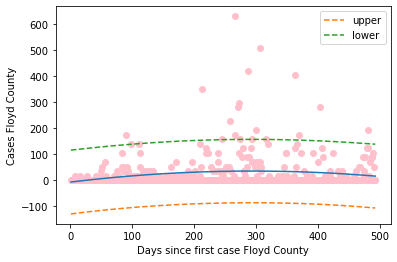

In [245]:
_,upper,lower=wls_prediction_std(poly2F)
plt.scatter(cases_F.Number_days_Day1,cases_F.new_cases,color='pink')
plt.plot(cases_F.Number_days_Day1,poly2F.predict(cases_F.Number_days_Day1))
plt.plot(cases_F.Number_days_Day1,upper,'--',label='upper')
plt.plot(cases_F.Number_days_Day1,lower,'--',label='lower')
plt.xlabel('Days since first case Floyd County')
plt.ylabel('Cases Floyd County')
plt.legend()

Deaths Floyd County

In [74]:
deaths_F=texas_county_F[['new_deaths','Number_days_Day1']]
lm_d_F = smf.ols(formula='new_deaths~Number_days_Day1', data=deaths_F).fit()
pred_deaths_F=lm_d_F.predict(deaths_F.Number_days_Day1)
pred_deaths_F

1489305    1.481642
1489306    1.480030
1489307    1.478419
1489308    1.476807
1489309    1.475195
             ...   
1489795    0.695190
1489796    0.693578
1489797    0.691967
1489798    0.690355
1489799    0.688744
Length: 493, dtype: float64

In [75]:
lm_d_F.params

Intercept           1.483253
Number_days_Day1   -0.001612
dtype: float64

In [76]:
x_new_deaths_F=pd.DataFrame({'Number_days_Day1':[494,495,496,497,498,499,500]})
pred_next_deaths_F=lm_d_F.predict(x_new_deaths_F.Number_days_Day1)
pred_next_deaths_F

0    0.687132
1    0.685520
2    0.683909
3    0.682297
4    0.680686
5    0.679074
6    0.677463
dtype: float64

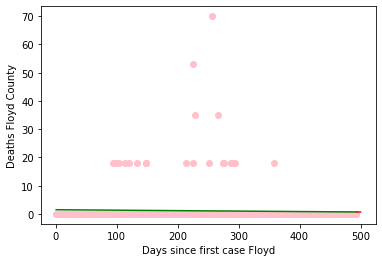

In [77]:
plt.scatter(deaths_F.Number_days_Day1,deaths_F.new_deaths,color='pink')
plt.plot(deaths_F.Number_days_Day1,pred_deaths_F,color='green')
plt.plot(x_new_deaths_F.Number_days_Day1,pred_next_deaths_F,color='red')
plt.xlabel('Days since first case Floyd')
plt.ylabel('Deaths Floyd County')
plt.show()


In [78]:
lm_d_F.rsquared

0.0016482061549546456

In [79]:
lm_d_F.pvalues

Intercept           0.003816
Number_days_Day1    0.368383
dtype: float64

In [80]:
lm_d_F.conf_int()

,0,1
Intercept,0.480685,2.485822
Number_days_Day1,-0.005129,0.001905


In [81]:
m.rmse(deaths_F.new_deaths,pred_deaths_F)

5.644737328201047

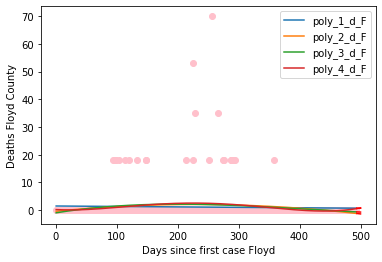

In [82]:
plt.scatter(deaths_F.Number_days_Day1,deaths_F.new_deaths,color='pink')
poly1_d_F=smf.ols(formula='new_deaths ~ 1+Number_days_Day1',data=deaths_F).fit()

plt.plot(deaths_F.Number_days_Day1,poly1_d_F.predict(deaths_F.Number_days_Day1),label='poly_1_d_F')
plt.plot(x_new_deaths_F.Number_days_Day1,poly1_d_F.predict(x_new_deaths_F.Number_days_Day1),color='red')

poly2_d_F=smf.ols(formula='new_deaths ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)',data=deaths_F).fit()

plt.plot(deaths_F.Number_days_Day1,poly2_d_F.predict(deaths_F.Number_days_Day1),label='poly_2_d_F')
plt.plot(x_new_deaths_F.Number_days_Day1,poly2_d_F.predict(x_new_deaths_F.Number_days_Day1),color='red')

poly3_d_F=smf.ols(formula='new_deaths ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)+I(Number_days_Day1**3.0)',data=deaths_F).fit()

plt.plot(deaths_F.Number_days_Day1,poly3_d_F.predict(deaths_F.Number_days_Day1),label='poly_3_d_F')
plt.plot(x_new_deaths_F.Number_days_Day1,poly3_d_F.predict(x_new_deaths_F.Number_days_Day1),color='red')

poly4_d_F=smf.ols(formula='new_deaths ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)+I(Number_days_Day1**3.0)+I(Number_days_Day1**4.0)',data=deaths_F).fit()

plt.plot(deaths_F.Number_days_Day1,poly4_d_F.predict(deaths_F.Number_days_Day1),label='poly_4_d_F')
plt.plot(x_new_deaths_F.Number_days_Day1,poly4_d_F.predict(x_new_deaths_F.Number_days_Day1),color='red')

plt.xlabel('Days since first case Floyd')
plt.ylabel('Deaths Floyd County')
plt.legend()

In [83]:
print('poly1_d_F_rsquared',poly1_d_F.rsquared)
print('poly2_d_F_rsquared',poly2_d_F.rsquared)
print('poly3_d_F_rsquared',poly3_d_F.rsquared)
print('poly4_d_F_rsquared',poly4_d_F.rsquared)
print('poly1_d_F_pvalues',poly1_d_F.pvalues)
print('poly2_d_F_pvalues',poly2_d_F.pvalues)
print('poly3_d_F_pvalues',poly3_d_F.pvalues)
print('poly4_d_F_pvalues',poly4_d_F.pvalues)

poly1_d_F_rsquared 0.0016482061549546456
poly2_d_F_rsquared 0.024263686858431943
poly3_d_F_rsquared 0.02572617528889365
poly4_d_F_rsquared 0.030641925510052737
poly1_d_F_pvalues Intercept           0.003816
Number_days_Day1    0.368383
dtype: float64
poly2_d_F_pvalues Intercept                     0.573212
Number_days_Day1              0.002522
I(Number_days_Day1 ** 2.0)    0.000811
dtype: float64
poly3_d_F_pvalues Intercept                     0.322450
Number_days_Day1              0.046419
I(Number_days_Day1 ** 2.0)    0.160587
I(Number_days_Day1 ** 3.0)    0.391996
dtype: float64
poly4_d_F_pvalues Intercept                     0.871680
Number_days_Day1              0.713367
I(Number_days_Day1 ** 2.0)    0.268917
I(Number_days_Day1 ** 3.0)    0.146646
I(Number_days_Day1 ** 4.0)    0.116338
dtype: float64


In [84]:
print('poly1_d_F_rmse',m.rmse(deaths_F.new_deaths,poly1_d_F.predict(deaths_F.Number_days_Day1)))
print('poly2_d_F_rmse',m.rmse(deaths_F.new_deaths,poly2_d_F.predict(deaths_F.Number_days_Day1)))
print('poly3_d_F_rmse',m.rmse(deaths_F.new_deaths,poly3_d_F.predict(deaths_F.Number_days_Day1)))
print('poly4_d_F_rmse',m.rmse(deaths_F.new_deaths,poly4_d_F.predict(deaths_F.Number_days_Day1)))

poly1_d_F_rmse 5.644737328201047
poly2_d_F_rmse 5.580436492021323
poly3_d_F_rmse 5.5762527878005805
poly4_d_F_rmse 5.562167358640649


In [85]:
poly1_d_F.conf_int()

,0,1
Intercept,0.480685,2.485822
Number_days_Day1,-0.005129,0.001905


In [86]:
poly2_d_F.conf_int()

,0,1
Intercept,-1.920094,1.063967
Number_days_Day1,0.007607,0.035504
I(Number_days_Day1 ** 2.0),-0.000074,-0.000020


In [87]:
poly3_d_F.conf_int()

,0,1
Intercept,-3.003697e+00,9.903592e-01
Number_days_Day1,5.660919e-04,7.051450e-02
I(Number_days_Day1 ** 2.0),-2.820247e-04,4.682996e-05
I(Number_days_Day1 ** 3.0),-1.233969e-07,3.142191e-07


In [88]:
poly4_d_F.conf_int()

,0,1
Intercept,-2.298061e+00,2.709978e+00
Number_days_Day1,-8.319542e-02,5.697459e-02
I(Number_days_Day1 ** 2.0),-2.515785e-04,9.006389e-04
I(Number_days_Day1 ** 3.0),-3.047247e-06,4.555244e-07
I(Number_days_Day1 ** 4.0),-3.506402e-10,3.166981e-09


For Floyd county ploy2_d_F is good fit.<br/>
Confidence interval for deaths 

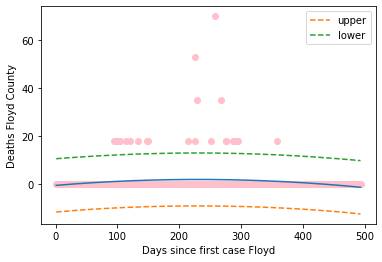

In [246]:
_,upper,lower=wls_prediction_std(poly2_d_F)
plt.scatter(deaths_F.Number_days_Day1,deaths_F.new_deaths,color='pink')
plt.plot(deaths_F.Number_days_Day1,poly2_d_F.predict(deaths_F.Number_days_Day1))
plt.plot(deaths_F.Number_days_Day1,upper,'--',label='upper')
plt.plot(deaths_F.Number_days_Day1,lower,'--',label='lower')
plt.xlabel('Days since first case Floyd')
plt.ylabel('Deaths Floyd County')
plt.legend()

Dimmit County

In [90]:
texas_county_D=texas_county[texas_county['County Name']=='Dimmit County ']
texas_county_D

,Date,countyFIPS,State,County Name,StateFIPS,population,Deaths,Cases
1481778,2020-01-22,48127,TX,Dimmit County,48,10124,0,0
1481779,2020-01-23,48127,TX,Dimmit County,48,10124,0,0
1481780,2020-01-24,48127,TX,Dimmit County,48,10124,0,0
1481781,2020-01-25,48127,TX,Dimmit County,48,10124,0,0
1481782,2020-01-26,48127,TX,Dimmit County,48,10124,0,0
...,...,...,...,...,...,...,...,...
1482346,2021-08-12,48127,TX,Dimmit County,48,10124,39,3219
1482347,2021-08-13,48127,TX,Dimmit County,48,10124,39,3233
1482348,2021-08-14,48127,TX,Dimmit County,48,10124,39,3235
1482349,2021-08-15,48127,TX,Dimmit County,48,10124,38,3235


Removing all data till first case

In [91]:
texas_county_D=texas_county_D[texas_county_D['Cases']>0]
texas_county_D['new_cases']=texas_county_D['Cases'].diff()
texas_county_D['new_deaths']=texas_county_D['Deaths'].diff()
texas_county_D

<ipython-input-91-dafd47fefaed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_county_D['new_cases']=texas_county_D['Cases'].diff()
<ipython-input-91-dafd47fefaed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_county_D['new_deaths']=texas_county_D['Deaths'].diff()


,Date,countyFIPS,State,County Name,StateFIPS,population,Deaths,Cases,new_cases,new_deaths
1481858,2020-04-11,48127,TX,Dimmit County,48,10124,0,1,NaN,NaN
1481859,2020-04-12,48127,TX,Dimmit County,48,10124,0,1,0.0,0.0
1481860,2020-04-13,48127,TX,Dimmit County,48,10124,0,1,0.0,0.0
1481861,2020-04-14,48127,TX,Dimmit County,48,10124,0,1,0.0,0.0
1481862,2020-04-15,48127,TX,Dimmit County,48,10124,0,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1482346,2021-08-12,48127,TX,Dimmit County,48,10124,39,3219,0.0,1.0
1482347,2021-08-13,48127,TX,Dimmit County,48,10124,39,3233,14.0,0.0
1482348,2021-08-14,48127,TX,Dimmit County,48,10124,39,3235,2.0,0.0
1482349,2021-08-15,48127,TX,Dimmit County,48,10124,38,3235,0.0,-1.0


In [92]:
#normalizing to 100000
texas_county_D['new_cases']=round((texas_county_D['new_cases']/texas_county_D['population'])*100000,0)
texas_county_D['new_deaths']=round((texas_county_D['new_deaths']/texas_county_D['population'])*100000,0)
texas_county_D

<ipython-input-92-1869acbfd373>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_county_D['new_cases']=round((texas_county_D['new_cases']/texas_county_D['population'])*100000,0)
<ipython-input-92-1869acbfd373>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_county_D['new_deaths']=round((texas_county_D['new_deaths']/texas_county_D['population'])*100000,0)


,Date,countyFIPS,State,County Name,StateFIPS,population,Deaths,Cases,new_cases,new_deaths
1481858,2020-04-11,48127,TX,Dimmit County,48,10124,0,1,NaN,NaN
1481859,2020-04-12,48127,TX,Dimmit County,48,10124,0,1,0.0,0.0
1481860,2020-04-13,48127,TX,Dimmit County,48,10124,0,1,0.0,0.0
1481861,2020-04-14,48127,TX,Dimmit County,48,10124,0,1,0.0,0.0
1481862,2020-04-15,48127,TX,Dimmit County,48,10124,0,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1482346,2021-08-12,48127,TX,Dimmit County,48,10124,39,3219,0.0,10.0
1482347,2021-08-13,48127,TX,Dimmit County,48,10124,39,3233,138.0,0.0
1482348,2021-08-14,48127,TX,Dimmit County,48,10124,39,3235,20.0,0.0
1482349,2021-08-15,48127,TX,Dimmit County,48,10124,38,3235,0.0,-10.0


Removing First case date 2020-04-11

In [93]:
#removing outlier 
texas_county_D=texas_county_D[texas_county_D['new_cases']<4000]
texas_county_D=texas_county_D[texas_county_D['Date']!='2020-04-11']
l=[]
for i in range(0,len(texas_county_D)):
    day=i+1
    l.append(day)
texas_county_D['Number_days_Day1']=l

Making negative values as 0

In [94]:
texas_county_D['new_cases'][texas_county_D['new_cases']<0]=0
texas_county_D['new_deaths'][texas_county_D['new_deaths']<0]=0

<ipython-input-94-0d4da10e3799>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_county_D['new_cases'][texas_county_D['new_cases']<0]=0
<ipython-input-94-0d4da10e3799>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_county_D['new_deaths'][texas_county_D['new_deaths']<0]=0


In [95]:
cases_D=texas_county_D[['new_cases','Number_days_Day1']]
lm_D = smf.ols(formula='new_cases~Number_days_Day1', data=cases_D).fit()
pred_D=lm_D.predict(cases_D.Number_days_Day1)
cases_D

,new_cases,Number_days_Day1
1481859,0.0,1
1481860,0.0,2
1481861,0.0,3
1481862,0.0,4
1481863,0.0,5
...,...,...
1482346,0.0,487
1482347,138.0,488
1482348,20.0,489
1482349,0.0,490


In [96]:
x_new_D=pd.DataFrame({'Number_days_Day1':[492,493,494,495,496,497,498]})
pred_next_D=lm_D.predict(x_new_D.Number_days_Day1)
pred_next_D

0    145.187647
1    145.503852
2    145.820057
3    146.136262
4    146.452467
5    146.768672
6    147.084877
dtype: float64

In [97]:
lm_D.params

Intercept          -10.385203
Number_days_Day1     0.316205
dtype: float64

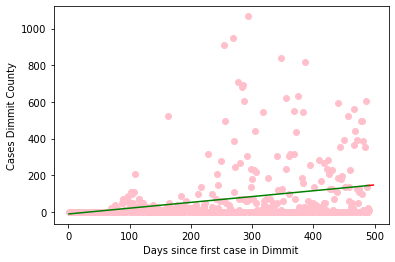

In [98]:
plt.scatter(cases_D.Number_days_Day1,cases_D.new_cases,color='pink')
plt.plot(cases_D.Number_days_Day1,pred_D,color='green')
plt.plot(x_new_D.Number_days_Day1,pred_next_D,color='red')
plt.xlabel('Days since first case in Dimmit')
plt.ylabel('Cases Dimmit County')
plt.show()

In [99]:
lm_D.rsquared

0.08362059768952745

In [100]:
lm_D.pvalues

Intercept           4.400469e-01
Number_days_Day1    6.518032e-11
dtype: float64

In [101]:
lm_D.conf_int()

,0,1
Intercept,-36.791246,16.020840
Number_days_Day1,0.223197,0.409213


In [102]:
m.rmse(cases_D.new_cases,pred_D)

148.36781446642445

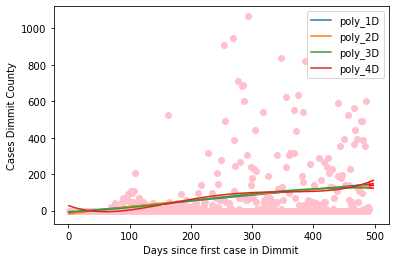

In [103]:
plt.scatter(cases_D.Number_days_Day1,cases_D.new_cases,color='pink')
poly1D=smf.ols(formula='new_cases ~ 1+Number_days_Day1',data=cases_D).fit()

plt.plot(cases_D.Number_days_Day1,poly1D.predict(cases_D.Number_days_Day1),label='poly_1D')
plt.plot(x_new_D.Number_days_Day1,poly1D.predict(x_new_D.Number_days_Day1),color='red')

poly2D=smf.ols(formula='new_cases ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)',data=cases_D).fit()

plt.plot(cases_D.Number_days_Day1,poly2D.predict(cases_D.Number_days_Day1),label='poly_2D')
plt.plot(x_new_D.Number_days_Day1,poly2D.predict(x_new_D.Number_days_Day1),color='red')

poly3D=smf.ols(formula='new_cases ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)+I(Number_days_Day1**3.0)',data=cases_D).fit()

plt.plot(cases_D.Number_days_Day1,poly3D.predict(cases_D.Number_days_Day1),label='poly_3D')
plt.plot(x_new_D.Number_days_Day1,poly3D.predict(x_new_D.Number_days_Day1),color='red')

poly4D=smf.ols(formula='new_cases ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)+I(Number_days_Day1**3.0)+I(Number_days_Day1**4.0)',data=cases_D).fit()

plt.plot(cases_D.Number_days_Day1,poly4D.predict(cases_D.Number_days_Day1),label='poly_4D')
plt.plot(x_new_D.Number_days_Day1,poly4D.predict(x_new_D.Number_days_Day1),color='red')

plt.xlabel('Days since first case in Dimmit')
plt.ylabel('Cases Dimmit County')
plt.legend()

In [104]:
print('poly1D_rsquared',poly1D.rsquared)
print('poly2D_rsquared',poly2D.rsquared)
print('poly3D_rsquared',poly3D.rsquared)
print('poly4D_rsquared',poly4D.rsquared)
print('poly1D_pvalues',poly1D.pvalues)
print('poly2D_pvalues',poly2D.pvalues)
print('poly3D_pvalues',poly3D.pvalues)
print('poly4D_pvalues',poly4D.pvalues)

poly1D_rsquared 0.08362059768952745
poly2D_rsquared 0.08421100888958499
poly3D_rsquared 0.08517494100803158
poly4D_rsquared 0.09021893558199523
poly1D_pvalues Intercept           4.400469e-01
Number_days_Day1    6.518032e-11
dtype: float64
poly2D_pvalues Intercept                     0.351583
Number_days_Day1              0.027653
I(Number_days_Day1 ** 2.0)    0.575120
dtype: float64
poly3D_pvalues Intercept                     0.825586
Number_days_Day1              0.822981
I(Number_days_Day1 ** 2.0)    0.540091
I(Number_days_Day1 ** 3.0)    0.474125
dtype: float64
poly4D_pvalues Intercept                     0.414319
Number_days_Day1              0.190315
I(Number_days_Day1 ** 2.0)    0.081018
I(Number_days_Day1 ** 3.0)    0.086401
I(Number_days_Day1 ** 4.0)    0.101344
dtype: float64


In [105]:
print('ploy1D_rmse',m.rmse(cases_D.new_cases,poly1D.predict(cases_D.Number_days_Day1)))
print('ploy2D_rmse',m.rmse(cases_D.new_cases,poly2D.predict(cases_D.Number_days_Day1)))
print('ploy3D_rmse',m.rmse(cases_D.new_cases,poly3D.predict(cases_D.Number_days_Day1)))
print('ploy4D_rmse',m.rmse(cases_D.new_cases,poly4D.predict(cases_D.Number_days_Day1)))

ploy1D_rmse 148.36781446642445
ploy2D_rmse 148.32001104936907
ploy3D_rmse 148.24193189289414
ploy4D_rmse 147.83269243222404


In [106]:
poly1D.conf_int()

,0,1
Intercept,-36.791246,16.020840
Number_days_Day1,0.223197,0.409213


In [107]:
poly2D.conf_int()

,0,1
Intercept,-58.596106,20.880454
Number_days_Day1,0.046312,0.792328
I(Number_days_Day1 ** 2.0),-0.000944,0.000525


In [108]:
poly3D.conf_int()

,0,1
Intercept,-59.171061,47.231164
Number_days_Day1,-0.828930,1.042073
I(Number_days_Day1 ** 2.0),-0.003038,0.005794
I(Number_days_Day1 ** 3.0),-0.000008,0.000004


In [109]:
poly4D.conf_int()

,0,1
Intercept,-3.896122e+01,9.442535e+01
Number_days_Day1,-3.125252e+00,6.232472e-01
I(Number_days_Day1 ** 2.0),-1.703785e-03,2.923449e-02
I(Number_days_Day1 ** 3.0),-8.850738e-05,5.927950e-06
I(Number_days_Day1 ** 4.0),-7.835649e-09,8.738556e-08


For Dimmit county Linear model that poly1D is best fit.<br/>
Confidence interval for Dimmit County


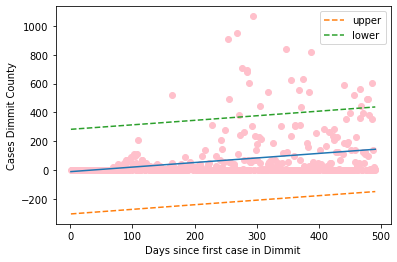

In [247]:
_,upper,lower=wls_prediction_std(poly1D)
plt.scatter(cases_D.Number_days_Day1,cases_D.new_cases,color='pink')
plt.plot(cases_D.Number_days_Day1,poly1D.predict(cases_D.Number_days_Day1))
plt.plot(cases_D.Number_days_Day1,upper,'--',label='upper')
plt.plot(cases_D.Number_days_Day1,lower,'--',label='lower')
plt.xlabel('Days since first case in Dimmit')
plt.ylabel('Cases Dimmit County')
plt.legend()

Deaths Dimmit County

In [111]:
deaths_D=texas_county_D[['new_deaths','Number_days_Day1']]
lm_d_D = smf.ols(formula='new_deaths~Number_days_Day1', data=deaths_D).fit()
pred_deaths_D=lm_d_D.predict(deaths_D.Number_days_Day1)
pred_deaths_D

1481859    0.319905
1481860    0.321841
1481861    0.323777
1481862    0.325714
1481863    0.327650
             ...   
1482346    1.260945
1482347    1.262881
1482348    1.264817
1482349    1.266754
1482350    1.268690
Length: 491, dtype: float64

In [112]:
x_new_deaths_D=pd.DataFrame({'Number_days_Day1':[492,493,494,495,496,497,498]})
pred_next_deaths_D=lm_d_D.predict(x_new_deaths_D.Number_days_Day1)
pred_next_deaths_D

0    1.270626
1    1.272563
2    1.274499
3    1.276435
4    1.278372
5    1.280308
6    1.282244
dtype: float64

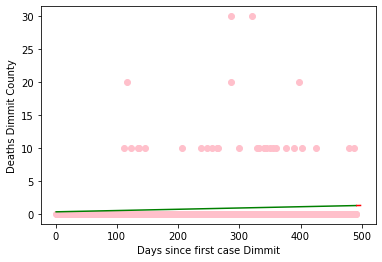

In [113]:
plt.scatter(deaths_D.Number_days_Day1,deaths_D.new_deaths,color='pink')
plt.plot(deaths_D.Number_days_Day1,pred_deaths_D,color='green')
plt.plot(x_new_deaths_D.Number_days_Day1,pred_next_deaths_D,color='red')
plt.xlabel('Days since first case Dimmit')
plt.ylabel('Deaths Dimmit County')
plt.show()

In [114]:
lm_d_D.conf_int()

,0,1
Intercept,-0.269699,0.905635
Number_days_Day1,-0.000134,0.004006


In [115]:
lm_d_D.pvalues

Intercept           0.288258
Number_days_Day1    0.066667
dtype: float64

In [116]:
lm_d_D.rsquared

0.006861174890578581

In [117]:
m.rmse(deaths_D.new_deaths,pred_deaths_D)

3.3019283271748274

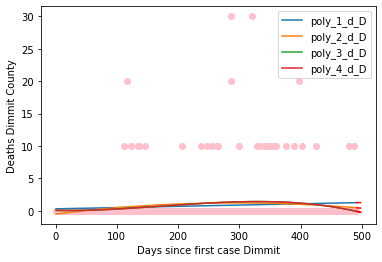

In [118]:
plt.scatter(deaths_D.Number_days_Day1,deaths_D.new_deaths,color='pink')
poly1_d_D=smf.ols(formula='new_deaths ~ 1+Number_days_Day1',data=deaths_D).fit()

plt.plot(deaths_D.Number_days_Day1,poly1_d_D.predict(deaths_D.Number_days_Day1),label='poly_1_d_D')
plt.plot(x_new_deaths_D.Number_days_Day1,poly1_d_D.predict(x_new_deaths_D.Number_days_Day1),color='red')

poly2_d_D=smf.ols(formula='new_deaths ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)',data=deaths_D).fit()

plt.plot(deaths_D.Number_days_Day1,poly2_d_D.predict(deaths_D.Number_days_Day1),label='poly_2_d_D')
plt.plot(x_new_deaths_D.Number_days_Day1,poly2_d_D.predict(x_new_deaths_D.Number_days_Day1),color='red')

poly3_d_D=smf.ols(formula='new_deaths ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)+I(Number_days_Day1**3.0)',data=deaths_D).fit()

plt.plot(deaths_D.Number_days_Day1,poly3_d_D.predict(deaths_D.Number_days_Day1),label='poly_3_d_D')
plt.plot(x_new_deaths_D.Number_days_Day1,poly3_d_D.predict(x_new_deaths_D.Number_days_Day1),color='red')

poly4_d_D=smf.ols(formula='new_deaths ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)+I(Number_days_Day1**3.0)+I(Number_days_Day1**4.0)',data=deaths_D).fit()

plt.plot(deaths_D.Number_days_Day1,poly4_d_D.predict(deaths_D.Number_days_Day1),label='poly_4_d_D')
plt.plot(x_new_deaths_D.Number_days_Day1,poly4_d_D.predict(x_new_deaths_D.Number_days_Day1),color='red')

plt.xlabel('Days since first case Dimmit')
plt.ylabel('Deaths Dimmit County')
plt.legend()

In [119]:
print('poly1_d_D_rsquared',poly1_d_D.rsquared)
print('poly2_d_D_rsquared',poly2_d_D.rsquared)
print('poly3_d_D_rsquared',poly3_d_D.rsquared)
print('poly4_d_D_rsquared',poly4_d_D.rsquared)
print('poly1_d_D_pvalues',poly1_d_D.pvalues)
print('poly2_d_D_pvalues',poly2_d_D.pvalues)
print('poly3_d_D_pvalues',poly3_d_D.pvalues)
print('poly4_d_D_pvalues',poly4_d_D.pvalues)

poly1_d_D_rsquared 0.006861174890578581
poly2_d_D_rsquared 0.018244964111144735
poly3_d_D_rsquared 0.02213890668562346
poly4_d_D_rsquared 0.022139334539327704
poly1_d_D_pvalues Intercept           0.288258
Number_days_Day1    0.066667
dtype: float64
poly2_d_D_pvalues Intercept                     0.286797
Number_days_Day1              0.005920
I(Number_days_Day1 ** 2.0)    0.017754
dtype: float64
poly3_d_D_pvalues Intercept                     0.898476
Number_days_Day1              0.862606
I(Number_days_Day1 ** 2.0)    0.328989
I(Number_days_Day1 ** 3.0)    0.164382
dtype: float64
poly4_d_D_pvalues Intercept                     0.912162
Number_days_Day1              0.921314
I(Number_days_Day1 ** 2.0)    0.770294
I(Number_days_Day1 ** 3.0)    0.850948
I(Number_days_Day1 ** 4.0)    0.988371
dtype: float64


In [120]:
print('poly1_d_D_rmse',m.rmse(deaths_D.new_deaths,poly1_d_D.predict(deaths_D.Number_days_Day1)))
print('poly2_d_D_rmse',m.rmse(deaths_D.new_deaths,poly2_d_D.predict(deaths_D.Number_days_Day1)))
print('poly3_d_D_rmse',m.rmse(deaths_D.new_deaths,poly3_d_D.predict(deaths_D.Number_days_Day1)))
print('poly4_d_D_rmse',m.rmse(deaths_D.new_deaths,poly4_d_D.predict(deaths_D.Number_days_Day1)))

poly1_d_D_rmse 3.3019283271748274
poly2_d_D_rmse 3.2829497157545813
poly3_d_D_rmse 3.2764326527696976
poly4_d_D_rmse 3.2764319359838416


In [121]:
poly1_d_D.conf_int()

,0,1
Intercept,-0.269699,0.905635
Number_days_Day1,-0.000134,0.004006


In [122]:
poly2_d_D.conf_int()

,0,1
Intercept,-1.356933,0.402220
Number_days_Day1,0.003359,0.019872
I(Number_days_Day1 ** 2.0),-0.000036,-0.000003


In [123]:
poly3_d_D.conf_int()

,0,1
Intercept,-1.099454e+00,1.252240e+00
Number_days_Day1,-2.249846e-02,1.885431e-02
I(Number_days_Day1 ** 2.0),-4.906421e-05,1.461411e-04
I(Number_days_Day1 ** 3.0),-2.228388e-07,3.798232e-08


In [124]:
poly4_d_D.conf_int()

,0,1
Intercept,-1.395102e+00,1.561159e+00
Number_days_Day1,-4.362857e-02,3.944983e-02
I(Number_days_Day1 ** 2.0),-2.918668e-04,3.938215e-04
I(Number_days_Day1 ** 3.0),-1.146624e-06,9.463560e-07
I(Number_days_Day1 ** 4.0),-1.047368e-09,1.063030e-09


For Dimmit County deaths poly2_d_D is best fit<br/>
Confidence interval for Dimmit Deaths

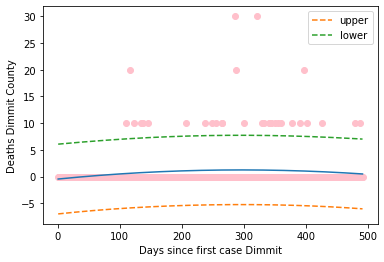

In [248]:
_,upper,lower=wls_prediction_std(poly2_d_D)
plt.scatter(deaths_D.Number_days_Day1,deaths_D.new_deaths,color='pink')
plt.plot(deaths_D.Number_days_Day1,poly2_d_D.predict(deaths_D.Number_days_Day1))
plt.plot(deaths_D.Number_days_Day1,upper,'--',label='upper')
plt.plot(deaths_D.Number_days_Day1,lower,'--',label='lower')
plt.xlabel('Days since first case Dimmit')
plt.ylabel('Deaths Dimmit County')
plt.legend()

Crockett County

In [126]:
texas_county_C=texas_county[texas_county['County Name']=='Crockett County ']
texas_county_C

,Date,countyFIPS,State,County Name,StateFIPS,population,Deaths,Cases
1475475,2020-01-22,48105,TX,Crockett County,48,3464,0,0
1475476,2020-01-23,48105,TX,Crockett County,48,3464,0,0
1475477,2020-01-24,48105,TX,Crockett County,48,3464,0,0
1475478,2020-01-25,48105,TX,Crockett County,48,3464,0,0
1475479,2020-01-26,48105,TX,Crockett County,48,3464,0,0
...,...,...,...,...,...,...,...,...
1476043,2021-08-12,48105,TX,Crockett County,48,3464,15,638
1476044,2021-08-13,48105,TX,Crockett County,48,3464,15,645
1476045,2021-08-14,48105,TX,Crockett County,48,3464,15,647
1476046,2021-08-15,48105,TX,Crockett County,48,3464,15,647


Removing till first case

In [127]:
texas_county_C=texas_county_C[texas_county_C['Cases']>0]
texas_county_C['new_cases']=texas_county_C['Cases'].diff()
texas_county_C['new_deaths']=texas_county_C['Deaths'].diff()
texas_county_C

<ipython-input-127-0ee56290ef7c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_county_C['new_cases']=texas_county_C['Cases'].diff()
<ipython-input-127-0ee56290ef7c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_county_C['new_deaths']=texas_county_C['Deaths'].diff()


,Date,countyFIPS,State,County Name,StateFIPS,population,Deaths,Cases,new_cases,new_deaths
1475610,2020-06-05,48105,TX,Crockett County,48,3464,0,1,NaN,NaN
1475611,2020-06-06,48105,TX,Crockett County,48,3464,0,1,0.0,0.0
1475612,2020-06-07,48105,TX,Crockett County,48,3464,0,1,0.0,0.0
1475613,2020-06-08,48105,TX,Crockett County,48,3464,0,1,0.0,0.0
1475614,2020-06-09,48105,TX,Crockett County,48,3464,0,4,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1476043,2021-08-12,48105,TX,Crockett County,48,3464,15,638,3.0,0.0
1476044,2021-08-13,48105,TX,Crockett County,48,3464,15,645,7.0,0.0
1476045,2021-08-14,48105,TX,Crockett County,48,3464,15,647,2.0,0.0
1476046,2021-08-15,48105,TX,Crockett County,48,3464,15,647,0.0,0.0


In [128]:
#normalizing to 100000
texas_county_C['new_cases']=round((texas_county_C['new_cases']/texas_county_C['population'])*100000,0)
texas_county_C['new_deaths']=round((texas_county_C['new_deaths']/texas_county_C['population'])*100000,0)
texas_county_C

<ipython-input-128-33f23cc47ffc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_county_C['new_cases']=round((texas_county_C['new_cases']/texas_county_C['population'])*100000,0)
<ipython-input-128-33f23cc47ffc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_county_C['new_deaths']=round((texas_county_C['new_deaths']/texas_county_C['population'])*100000,0)


,Date,countyFIPS,State,County Name,StateFIPS,population,Deaths,Cases,new_cases,new_deaths
1475610,2020-06-05,48105,TX,Crockett County,48,3464,0,1,NaN,NaN
1475611,2020-06-06,48105,TX,Crockett County,48,3464,0,1,0.0,0.0
1475612,2020-06-07,48105,TX,Crockett County,48,3464,0,1,0.0,0.0
1475613,2020-06-08,48105,TX,Crockett County,48,3464,0,1,0.0,0.0
1475614,2020-06-09,48105,TX,Crockett County,48,3464,0,4,87.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1476043,2021-08-12,48105,TX,Crockett County,48,3464,15,638,87.0,0.0
1476044,2021-08-13,48105,TX,Crockett County,48,3464,15,645,202.0,0.0
1476045,2021-08-14,48105,TX,Crockett County,48,3464,15,647,58.0,0.0
1476046,2021-08-15,48105,TX,Crockett County,48,3464,15,647,0.0,0.0


Removing first case date 2020-06-05


In [129]:
#removing outlier 
texas_county_C=texas_county_C[texas_county_C['new_cases']<3500]
texas_county_C=texas_county_C[texas_county_C['Date']!='2020-06-05']
l=[]
for i in range(0,len(texas_county_C)):
    day=i+1
    l.append(day)
texas_county_C['Number_days_Day1']=l

Making negative values as 0

In [130]:
texas_county_C['new_cases'][texas_county_C['new_cases']<0]=0
texas_county_C['new_deaths'][texas_county_C['new_deaths']<0]=0

<ipython-input-130-daa9e4f5a1e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_county_C['new_cases'][texas_county_C['new_cases']<0]=0
<ipython-input-130-daa9e4f5a1e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_county_C['new_deaths'][texas_county_C['new_deaths']<0]=0


In [131]:
cases_C=texas_county_C[['new_cases','Number_days_Day1']]
lm_C = smf.ols(formula='new_cases~Number_days_Day1', data=cases_C).fit()
pred_C=lm_C.predict(cases_C.Number_days_Day1)
cases_C

,new_cases,Number_days_Day1
1475611,0.0,1
1475612,0.0,2
1475613,0.0,3
1475614,87.0,4
1475615,29.0,5
...,...,...
1476043,87.0,431
1476044,202.0,432
1476045,58.0,433
1476046,0.0,434


In [132]:
x_new_C=pd.DataFrame({'Number_days_Day1':[436,437,438,439,440,441,442]})
pred_next_C=lm_C.predict(x_new_C.Number_days_Day1)
pred_next_C

0    17.653795
1    17.571452
2    17.489109
3    17.406766
4    17.324423
5    17.242080
6    17.159736
dtype: float64

In [133]:
lm_C.params

Intercept           53.555400
Number_days_Day1    -0.082343
dtype: float64

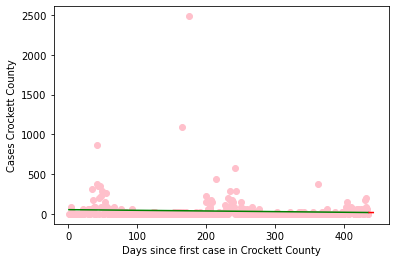

In [134]:
plt.scatter(cases_C.Number_days_Day1,cases_C.new_cases,color='pink')
plt.plot(cases_C.Number_days_Day1,pred_C,color='green')
plt.plot(x_new_C.Number_days_Day1,pred_next_C,color='red')
plt.xlabel('Days since first case in Crockett County')
plt.ylabel('Cases Crockett County')
plt.show()

In [135]:
lm_C.rsquared

0.004750997131430346

In [136]:
lm_C.pvalues

Intercept           0.000228
Number_days_Day1    0.151239
dtype: float64

In [137]:
lm_C.conf_int()

,0,1
Intercept,25.235134,81.875666
Number_days_Day1,-0.194913,0.030226


In [138]:
m.rmse(cases_C.new_cases,pred_C)

149.65745392431162

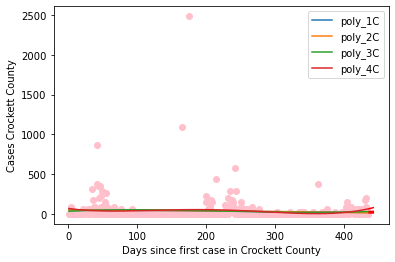

In [139]:
plt.scatter(cases_C.Number_days_Day1,cases_C.new_cases,color='pink')
poly1C=smf.ols(formula='new_cases ~ 1+Number_days_Day1',data=cases_C).fit()

plt.plot(cases_C.Number_days_Day1,poly1C.predict(cases_C.Number_days_Day1),label='poly_1C')
plt.plot(x_new_C.Number_days_Day1,poly1C.predict(x_new_C.Number_days_Day1),color='red')

poly2C=smf.ols(formula='new_cases ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)',data=cases_C).fit()

plt.plot(cases_C.Number_days_Day1,poly2C.predict(cases_C.Number_days_Day1),label='poly_2C')
plt.plot(x_new_C.Number_days_Day1,poly2C.predict(x_new_C.Number_days_Day1),color='red')

poly3C=smf.ols(formula='new_cases ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)+I(Number_days_Day1**3.0)',data=cases_C).fit()

plt.plot(cases_C.Number_days_Day1,poly3C.predict(cases_C.Number_days_Day1),label='poly_3C')
plt.plot(x_new_C.Number_days_Day1,poly3C.predict(x_new_C.Number_days_Day1),color='red')

poly4C=smf.ols(formula='new_cases ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)+I(Number_days_Day1**3.0)+I(Number_days_Day1**4.0)',data=cases_C).fit()

plt.plot(cases_C.Number_days_Day1,poly4C.predict(cases_C.Number_days_Day1),label='poly_4C')
plt.plot(x_new_C.Number_days_Day1,poly4C.predict(x_new_C.Number_days_Day1),color='red')

plt.xlabel('Days since first case in Crockett County')
plt.ylabel('Cases Crockett County')
plt.legend()

In [140]:
print('poly1C_rsquared',poly1C.rsquared)
print('poly2C_rsquared',poly2C.rsquared)
print('poly3C_rsquared',poly3C.rsquared)
print('poly4C_rsquared',poly4C.rsquared)
print('poly1C_pvalues',poly1C.pvalues)
print('poly2C_pvalues',poly2C.pvalues)
print('poly3C_pvalues',poly3C.pvalues)
print('poly4C_pvalues',poly4C.pvalues)

poly1C_rsquared 0.004750997131430346
poly2C_rsquared 0.004890100858579882
poly3C_rsquared 0.006565865639343138
poly4C_rsquared 0.012639811904200382
poly1C_pvalues Intercept           0.000228
Number_days_Day1    0.151239
dtype: float64
poly2C_pvalues Intercept                     0.022828
Number_days_Day1              0.904309
I(Number_days_Day1 ** 2.0)    0.806000
dtype: float64
poly3C_pvalues Intercept                     0.255328
Number_days_Day1              0.463366
I(Number_days_Day1 ** 2.0)    0.378463
I(Number_days_Day1 ** 3.0)    0.394322
dtype: float64
poly4C_pvalues Intercept                     0.059028
Number_days_Day1              0.297026
I(Number_days_Day1 ** 2.0)    0.191783
I(Number_days_Day1 ** 3.0)    0.132499
I(Number_days_Day1 ** 4.0)    0.104594
dtype: float64


In [141]:
print('ploy1C_rmse',m.rmse(cases_C.new_cases,poly1C.predict(cases_C.Number_days_Day1)))
print('ploy2C_rmse',m.rmse(cases_C.new_cases,poly2C.predict(cases_C.Number_days_Day1)))
print('ploy3C_rmse',m.rmse(cases_C.new_cases,poly3C.predict(cases_C.Number_days_Day1)))
print('ploy4C_rmse',m.rmse(cases_C.new_cases,poly4C.predict(cases_C.Number_days_Day1)))

ploy1C_rmse 149.65745392431162
ploy2C_rmse 149.64699491503572
ploy3C_rmse 149.52093907521643
ploy4C_rmse 149.06314597402485


In [142]:
poly1C.conf_int()

,0,1
Intercept,25.235134,81.875666
Number_days_Day1,-0.194913,0.030226


In [143]:
poly2C.conf_int()

,0,1
Intercept,6.922263,92.221222
Number_days_Day1,-0.479394,0.424099
I(Number_days_Day1 ** 2.0),-0.001129,0.000878


In [144]:
poly3C.conf_int()

,0,1
Intercept,-24.016111,90.213167
Number_days_Day1,-0.710007,1.556322
I(Number_days_Day1 ** 2.0),-0.008743,0.003328
I(Number_days_Day1 ** 3.0),-0.000005,0.000013


In [145]:
poly4C.conf_int()

,0,1
Intercept,-2.641693e+00,1.406187e+02
Number_days_Day1,-3.477244e+00,1.064567e+00
I(Number_days_Day1 ** 2.0),-7.080546e-03,3.521214e-02
I(Number_days_Day1 ** 3.0),-1.286819e-04,1.698318e-05
I(Number_days_Day1 ** 4.0),-1.429664e-08,1.514463e-07


For Crockett County best fit is poly4C<br/>
Confidence interval for Crockett County

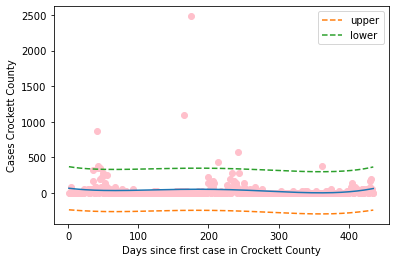

In [249]:
_,upper,lower=wls_prediction_std(poly4C)
plt.scatter(cases_C.Number_days_Day1,cases_C.new_cases,color='pink')
plt.plot(cases_C.Number_days_Day1,poly4C.predict(cases_C.Number_days_Day1))
plt.plot(cases_C.Number_days_Day1,upper,'--',label='upper')
plt.plot(cases_C.Number_days_Day1,lower,'--',label='lower')
plt.xlabel('Days since first case in Crockett County')
plt.ylabel('Cases Crockett County')
plt.legend()

Deaths Crockett County

In [147]:
deaths_C=texas_county_C[['new_deaths','Number_days_Day1']]
lm_d_C = smf.ols(formula='new_deaths~Number_days_Day1', data=deaths_C).fit()
pred_deaths_C=lm_d_C.predict(deaths_C.Number_days_Day1)
pred_deaths_C

1475611    2.409480
1475612    2.403599
1475613    2.397718
1475614    2.391838
1475615    2.385957
             ...   
1476043   -0.119290
1476044   -0.125171
1476045   -0.131052
1476046   -0.136933
1476047   -0.142813
Length: 435, dtype: float64

In [148]:
x_new_deaths_C=pd.DataFrame({'Number_days_Day1':[436,437,438,439,440,441,442]})
pred_next_deaths_C=lm_d_C.predict(x_new_deaths_C.Number_days_Day1)
pred_next_deaths_C

0   -0.148694
1   -0.154575
2   -0.160456
3   -0.166337
4   -0.172218
5   -0.178099
6   -0.183979
dtype: float64

In [149]:
lm_d_C.pvalues

Intercept           0.000264
Number_days_Day1    0.024733
dtype: float64

In [150]:
lm_d_C.params

Intercept           2.415361
Number_days_Day1   -0.005881
dtype: float64

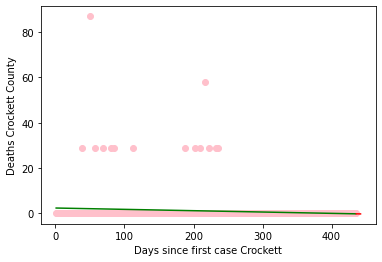

In [151]:
plt.scatter(deaths_C.Number_days_Day1,deaths_C.new_deaths,color='pink')
plt.plot(deaths_C.Number_days_Day1,pred_deaths_C,color='green')
plt.plot(x_new_deaths_C.Number_days_Day1,pred_next_deaths_C,color='red')
plt.xlabel('Days since first case Crockett')
plt.ylabel('Deaths Crockett County')
plt.show()

In [152]:
m.rmse(deaths_C.new_deaths,pred_deaths_C)

6.8193501938238406

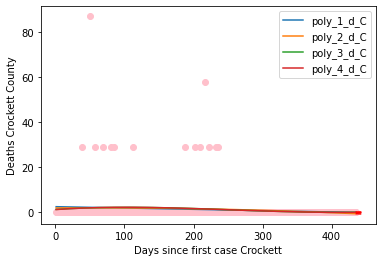

In [153]:
plt.scatter(deaths_C.Number_days_Day1,deaths_C.new_deaths,color='pink')
poly1_d_C=smf.ols(formula='new_deaths ~ 1+Number_days_Day1',data=deaths_C).fit()

plt.plot(deaths_C.Number_days_Day1,poly1_d_C.predict(deaths_C.Number_days_Day1),label='poly_1_d_C')
plt.plot(x_new_deaths_C.Number_days_Day1,poly1_d_C.predict(x_new_deaths_C.Number_days_Day1),color='red')

poly2_d_C=smf.ols(formula='new_deaths ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)',data=deaths_C).fit()

plt.plot(deaths_C.Number_days_Day1,poly2_d_C.predict(deaths_C.Number_days_Day1),label='poly_2_d_C')
plt.plot(x_new_deaths_C.Number_days_Day1,poly2_d_C.predict(x_new_deaths_C.Number_days_Day1),color='red')

poly3_d_C=smf.ols(formula='new_deaths ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)+I(Number_days_Day1**3.0)',data=deaths_C).fit()

plt.plot(deaths_C.Number_days_Day1,poly3_d_C.predict(deaths_C.Number_days_Day1),label='poly_3_d_C')
plt.plot(x_new_deaths_C.Number_days_Day1,poly3_d_C.predict(x_new_deaths_C.Number_days_Day1),color='red')

poly4_d_C=smf.ols(formula='new_deaths ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)+I(Number_days_Day1**3.0)+I(Number_days_Day1**4.0)',data=deaths_C).fit()

plt.plot(deaths_C.Number_days_Day1,poly4_d_C.predict(deaths_C.Number_days_Day1),label='poly_4_d_C')
plt.plot(x_new_deaths_C.Number_days_Day1,poly4_d_C.predict(x_new_deaths_C.Number_days_Day1),color='red')

plt.xlabel('Days since first case Crockett')
plt.ylabel('Deaths Crockett County')
plt.legend()

In [154]:
print('poly1_d_C_rsquared',poly1_d_C.rsquared)
print('poly2_d_C_rsquared',poly2_d_C.rsquared)
print('poly3_d_C_rsquared',poly3_d_C.rsquared)
print('poly4_d_C_rsquared',poly4_d_C.rsquared)
print('poly1_d_C_pvalues',poly1_d_C.pvalues)
print('poly2_d_C_pvalues',poly2_d_C.pvalues)
print('poly3_d_C_pvalues',poly3_d_C.pvalues)
print('poly4_d_C_pvalues',poly4_d_C.pvalues)

poly1_d_C_rsquared 0.011591173261743526
poly2_d_C_rsquared 0.012953195812425933
poly3_d_C_rsquared 0.014282708035991853
poly4_d_C_rsquared 0.014289285547424702
poly1_d_C_pvalues Intercept           0.000264
Number_days_Day1    0.024733
dtype: float64
poly2_d_C_pvalues Intercept                     0.062505
Number_days_Day1              0.852686
I(Number_days_Day1 ** 2.0)    0.440486
dtype: float64
poly3_d_C_pvalues Intercept                     0.375354
Number_days_Day1              0.439795
I(Number_days_Day1 ** 2.0)    0.379264
I(Number_days_Day1 ** 3.0)    0.446211
dtype: float64
poly4_d_C_pvalues Intercept                     0.501318
Number_days_Day1              0.666596
I(Number_days_Day1 ** 2.0)    0.762951
I(Number_days_Day1 ** 3.0)    0.882314
I(Number_days_Day1 ** 4.0)    0.957306
dtype: float64


In [155]:
print('poly1_d_C_rmse',m.rmse(deaths_C.new_deaths,poly1_d_C.predict(deaths_C.Number_days_Day1)))
print('poly2_d_C_rmse',m.rmse(deaths_C.new_deaths,poly2_d_C.predict(deaths_C.Number_days_Day1)))
print('poly3_d_C_rmse',m.rmse(deaths_C.new_deaths,poly3_d_C.predict(deaths_C.Number_days_Day1)))
print('poly4_d_C_rmse',m.rmse(deaths_C.new_deaths,poly4_d_C.predict(deaths_C.Number_days_Day1)))

poly1_d_C_rmse 6.8193501938238406
poly2_d_C_rmse 6.8146500583928775
poly3_d_C_rmse 6.81005898252512
poly4_d_C_rmse 6.810036261347402


In [156]:
poly1_d_C.conf_int()

,0,1
Intercept,1.124909,3.705813
Number_days_Day1,-0.011010,-0.000751


In [157]:
poly2_d_C.conf_int()

,0,1
Intercept,-0.096782,3.787577
Number_days_Day1,-0.018627,0.022516
I(Number_days_Day1 ** 2.0),-0.000064,0.000028


In [158]:
poly3_d_C.conf_int()

,0,1
Intercept,-1.426841e+00,3.775829e+00
Number_days_Day1,-3.130630e-02,7.191559e-02
I(Number_days_Day1 ** 2.0),-3.980034e-04,1.517982e-04
I(Number_days_Day1 ** 3.0),-2.536991e-07,5.752711e-07


In [159]:
poly4_d_C.conf_int()

,0,1
Intercept,-2.151975e+00,4.392959e+00
Number_days_Day1,-8.099116e-02,1.265041e-01
I(Number_days_Day1 ** 2.0),-1.114424e-03,8.177425e-04
I(Number_days_Day1 ** 3.0),-3.076635e-06,3.578156e-06
I(Number_days_Day1 ** 4.0),-3.889212e-09,3.682849e-09


For Crockett County best fit is poly1_d_C<br/>
Confidence interval for Crockett County deaths

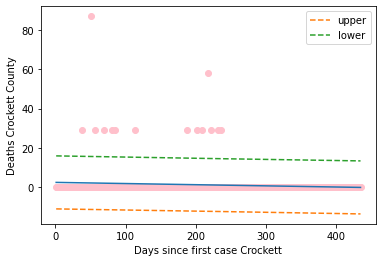

In [250]:
_,upper,lower=wls_prediction_std(poly1_d_C)
plt.scatter(deaths_C.Number_days_Day1,deaths_C.new_deaths,color='pink')
plt.plot(deaths_C.Number_days_Day1,poly1_d_C.predict(deaths_C.Number_days_Day1))
plt.plot(deaths_C.Number_days_Day1,upper,'--',label='upper')
plt.plot(deaths_C.Number_days_Day1,lower,'--',label='lower')
plt.xlabel('Days since first case Crockett')
plt.ylabel('Deaths Crockett County')
plt.legend()

Concho County

In [161]:
texas_county_CC=texas_county[texas_county['County Name']=='Concho County ']
texas_county_CC

,Date,countyFIPS,State,County Name,StateFIPS,population,Deaths,Cases
1472610,2020-01-22,48095,TX,Concho County,48,2726,0,0
1472611,2020-01-23,48095,TX,Concho County,48,2726,0,0
1472612,2020-01-24,48095,TX,Concho County,48,2726,0,0
1472613,2020-01-25,48095,TX,Concho County,48,2726,0,0
1472614,2020-01-26,48095,TX,Concho County,48,2726,0,0
...,...,...,...,...,...,...,...,...
1473178,2021-08-12,48095,TX,Concho County,48,2726,9,576
1473179,2021-08-13,48095,TX,Concho County,48,2726,9,580
1473180,2021-08-14,48095,TX,Concho County,48,2726,9,587
1473181,2021-08-15,48095,TX,Concho County,48,2726,9,587


Remove data till first case

In [162]:
texas_county_CC=texas_county_CC[texas_county_CC['Cases']>0]
texas_county_CC['new_cases']=texas_county_CC['Cases'].diff()
texas_county_CC['new_deaths']=texas_county_CC['Deaths'].diff()

<ipython-input-162-90350fe151eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_county_CC['new_cases']=texas_county_CC['Cases'].diff()
<ipython-input-162-90350fe151eb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_county_CC['new_deaths']=texas_county_CC['Deaths'].diff()


In [163]:
#normalizing to 100000
texas_county_CC['new_cases']=round((texas_county_CC['new_cases']/texas_county_CC['population'])*100000,0)
texas_county_CC['new_deaths']=round((texas_county_CC['new_deaths']/texas_county_CC['population'])*100000,0)
texas_county_CC

<ipython-input-163-b6495bab880a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_county_CC['new_cases']=round((texas_county_CC['new_cases']/texas_county_CC['population'])*100000,0)
<ipython-input-163-b6495bab880a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_county_CC['new_deaths']=round((texas_county_CC['new_deaths']/texas_county_CC['population'])*100000,0)


,Date,countyFIPS,State,County Name,StateFIPS,population,Deaths,Cases,new_cases,new_deaths
1472689,2020-04-10,48095,TX,Concho County,48,2726,0,1,NaN,NaN
1472690,2020-04-11,48095,TX,Concho County,48,2726,0,1,0.0,0.0
1472691,2020-04-12,48095,TX,Concho County,48,2726,0,1,0.0,0.0
1472692,2020-04-13,48095,TX,Concho County,48,2726,0,1,0.0,0.0
1472693,2020-04-14,48095,TX,Concho County,48,2726,0,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1473178,2021-08-12,48095,TX,Concho County,48,2726,9,576,1541.0,0.0
1473179,2021-08-13,48095,TX,Concho County,48,2726,9,580,147.0,0.0
1473180,2021-08-14,48095,TX,Concho County,48,2726,9,587,257.0,0.0
1473181,2021-08-15,48095,TX,Concho County,48,2726,9,587,0.0,0.0


Removing first date 2020-04-10

In [164]:
#removing outlier 
texas_county_CC=texas_county_CC[texas_county_CC['new_cases']<3500]
texas_county_CC=texas_county_CC[texas_county_CC['Date']!='2020-04-10']
l=[]
for i in range(0,len(texas_county_CC)):
    day=i+1
    l.append(day)
texas_county_CC['Number_days_Day1']=l

In [165]:
texas_county_CC['new_cases'][texas_county_CC['new_cases']<0]=0
texas_county_CC['new_deaths'][texas_county_CC['new_deaths']<0]=0

<ipython-input-165-cfb2f5f42d7c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_county_CC['new_cases'][texas_county_CC['new_cases']<0]=0
<ipython-input-165-cfb2f5f42d7c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_county_CC['new_deaths'][texas_county_CC['new_deaths']<0]=0


In [166]:
cases_CC=texas_county_CC[['new_cases','Number_days_Day1']]
lm_CC = smf.ols(formula='new_cases~Number_days_Day1', data=cases_CC).fit()
pred_CC=lm_CC.predict(cases_CC.Number_days_Day1)
pred_CC

1472690    10.044518
1472691    10.191059
1472692    10.337599
1472693    10.484140
1472694    10.630681
             ...    
1473178    81.409969
1473179    81.556510
1473180    81.703051
1473181    81.849592
1473182    81.996133
Length: 492, dtype: float64

In [167]:
x_new_CC=pd.DataFrame({'Number_days_Day1':[493,494,495,496,497,498,499]})
pred_next_CC=lm_CC.predict(x_new_CC.Number_days_Day1)
pred_next_CC

0    82.142674
1    82.289215
2    82.435756
3    82.582297
4    82.728838
5    82.875379
6    83.021920
dtype: float64

In [168]:
lm_CC.params

Intercept           9.897977
Number_days_Day1    0.146541
dtype: float64

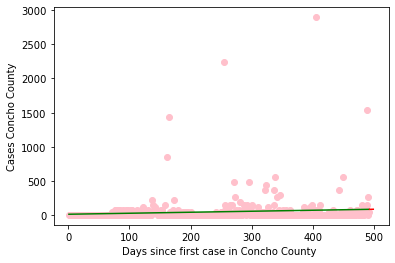

In [169]:
plt.scatter(cases_CC.Number_days_Day1,cases_CC.new_cases,color='pink')
plt.plot(cases_CC.Number_days_Day1,pred_CC,color='green')
plt.plot(x_new_CC.Number_days_Day1,pred_next_CC,color='red')
plt.xlabel('Days since first case in Concho County ')
plt.ylabel('Cases Concho County')
plt.show()

In [170]:
lm_CC.pvalues

Intercept           0.588412
Number_days_Day1    0.022993
dtype: float64

In [171]:
lm_CC.rsquared

0.01050424546958928

In [172]:
lm_CC.conf_int()

,0,1
Intercept,-26.016839,45.812792
Number_days_Day1,0.020298,0.272784


In [173]:
m.rmse(cases_CC.new_cases,pred_CC)

202.00270045477453

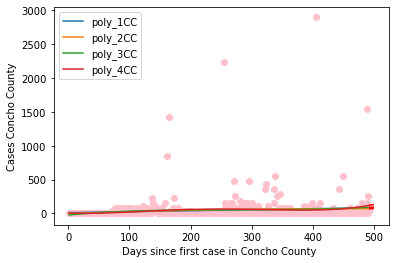

In [174]:
plt.scatter(cases_CC.Number_days_Day1,cases_CC.new_cases,color='pink')
poly1CC=smf.ols(formula='new_cases ~ 1+Number_days_Day1',data=cases_CC).fit()

plt.plot(cases_CC.Number_days_Day1,poly1CC.predict(cases_CC.Number_days_Day1),label='poly_1CC')
plt.plot(x_new_CC.Number_days_Day1,poly1CC.predict(x_new_CC.Number_days_Day1),color='red')

poly2CC=smf.ols(formula='new_cases ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)',data=cases_CC).fit()

plt.plot(cases_CC.Number_days_Day1,poly2CC.predict(cases_CC.Number_days_Day1),label='poly_2CC')
plt.plot(x_new_CC.Number_days_Day1,poly2CC.predict(x_new_CC.Number_days_Day1),color='red')

poly3CC=smf.ols(formula='new_cases ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)+I(Number_days_Day1**3.0)',data=cases_CC).fit()

plt.plot(cases_CC.Number_days_Day1,poly3CC.predict(cases_CC.Number_days_Day1),label='poly_3CC')
plt.plot(x_new_CC.Number_days_Day1,poly3CC.predict(x_new_CC.Number_days_Day1),color='red')

poly4CC=smf.ols(formula='new_cases ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)+I(Number_days_Day1**3.0)+I(Number_days_Day1**4.0)',data=cases_CC).fit()

plt.plot(cases_CC.Number_days_Day1,poly4CC.predict(cases_CC.Number_days_Day1),label='poly_4CC')
plt.plot(x_new_CC.Number_days_Day1,poly4CC.predict(x_new_CC.Number_days_Day1),color='red')

plt.xlabel('Days since first case in Concho County ')
plt.ylabel('Cases Concho County')
plt.legend()

In [175]:
print('poly1CC_rsquared',poly1CC.rsquared)
print('poly2CC_rsquared',poly2CC.rsquared)
print('poly3CC_rsquared',poly3CC.rsquared)
print('poly4CC_rsquared',poly4CC.rsquared)
print('poly1CC_pvalues',poly1CC.pvalues)
print('poly2CC_pvalues',poly2CC.pvalues)
print('poly3CC_pvalues',poly3CC.pvalues)
print('poly4CC_pvalues',poly4CC.pvalues)

poly1CC_rsquared 0.01050424546958928
poly2CC_rsquared 0.01136471794051408
poly3CC_rsquared 0.012806263585321442
poly4CC_rsquared 0.0150779769785776
poly1CC_pvalues Intercept           0.588412
Number_days_Day1    0.022993
dtype: float64
poly2CC_pvalues Intercept                     0.898693
Number_days_Day1              0.230522
I(Number_days_Day1 ** 2.0)    0.514459
dtype: float64
poly3CC_pvalues Intercept                     0.512088
Number_days_Day1              0.210859
I(Number_days_Day1 ** 2.0)    0.347232
I(Number_days_Day1 ** 3.0)    0.398996
dtype: float64
poly4CC_pvalues Intercept                     0.905680
Number_days_Day1              0.768456
I(Number_days_Day1 ** 2.0)    0.454987
I(Number_days_Day1 ** 3.0)    0.344494
I(Number_days_Day1 ** 4.0)    0.289743
dtype: float64


In [176]:
print('ploy1CC_rmse',m.rmse(cases_CC.new_cases,poly1CC.predict(cases_CC.Number_days_Day1)))
print('ploy2CC_rmse',m.rmse(cases_CC.new_cases,poly2CC.predict(cases_CC.Number_days_Day1)))
print('ploy3CC_rmse',m.rmse(cases_CC.new_cases,poly3CC.predict(cases_CC.Number_days_Day1)))
print('ploy4CC_rmse',m.rmse(cases_CC.new_cases,poly4CC.predict(cases_CC.Number_days_Day1)))

ploy1CC_rmse 202.00270045477453
ploy2CC_rmse 201.91484986687425
ploy3CC_rmse 201.76758845587958
ploy4CC_rmse 201.5353026788222


In [177]:
poly1CC.conf_int()

,0,1
Intercept,-26.016839,45.812792
Number_days_Day1,0.020298,0.272784


In [178]:
poly2CC.conf_int()

,0,1
Intercept,-57.544956,50.538006
Number_days_Day1,-0.196926,0.815550
I(Number_days_Day1 ** 2.0),-0.001325,0.000664


In [179]:
poly3CC.conf_int()

,0,1
Intercept,-96.487675,48.181705
Number_days_Day1,-0.459974,2.078773
I(Number_days_Day1 ** 2.0),-0.008843,0.003116
I(Number_days_Day1 ** 3.0),-0.000005,0.000011


In [180]:
poly4CC.conf_int()

,0,1
Intercept,-8.534454e+01,9.630455e+01
Number_days_Day1,-2.929101e+00,2.165366e+00
I(Number_days_Day1 ** 2.0),-1.299667e-02,2.896540e-02
I(Number_days_Day1 ** 3.0),-9.469143e-05,3.313300e-05
I(Number_days_Day1 ** 4.0),-2.962268e-08,9.900404e-08


For concho county linear model is best fit<br/>
Confidence interval for Concho cases

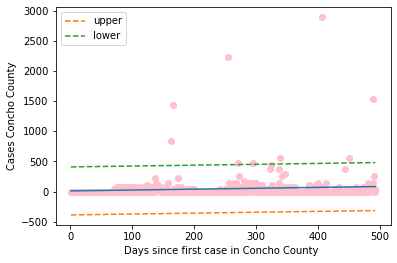

In [251]:
_,upper,lower=wls_prediction_std(poly1CC)
plt.scatter(cases_CC.Number_days_Day1,cases_CC.new_cases,color='pink')
plt.plot(cases_CC.Number_days_Day1,poly1CC.predict(cases_CC.Number_days_Day1))
plt.plot(cases_CC.Number_days_Day1,upper,'--',label='upper')
plt.plot(cases_CC.Number_days_Day1,lower,'--',label='lower')
plt.xlabel('Days since first case in Concho County ')
plt.ylabel('Cases Concho County')
plt.legend()

Deaths Concho

In [182]:
deaths_CC=texas_county_CC[['new_deaths','Number_days_Day1']]
lm_d_CC = smf.ols(formula='new_deaths~Number_days_Day1', data=deaths_CC).fit()
pred_deaths_CC=lm_d_CC.predict(deaths_CC.Number_days_Day1)
pred_deaths_CC

1472690    0.616575
1472691    0.617127
1472692    0.617679
1472693    0.618230
1472694    0.618782
             ...   
1473178    0.885283
1473179    0.885835
1473180    0.886386
1473181    0.886938
1473182    0.887490
Length: 492, dtype: float64

In [183]:
lm_d_CC.params

Intercept           0.616023
Number_days_Day1    0.000552
dtype: float64

In [184]:
x_new_deaths_CC=pd.DataFrame({'Number_days_Day1':[493,494,495,496,497,498,499]})
pred_next_deaths_CC=lm_d_CC.predict(x_new_deaths_CC.Number_days_Day1)
pred_next_deaths_CC

0    0.888042
1    0.888593
2    0.889145
3    0.889697
4    0.890249
5    0.890800
6    0.891352
dtype: float64

In [185]:
lm_d_CC.pvalues

Intercept           0.192831
Number_days_Day1    0.739816
dtype: float64

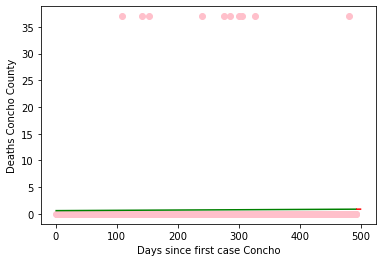

In [186]:
plt.scatter(deaths_CC.Number_days_Day1,deaths_CC.new_deaths,color='pink')
plt.plot(deaths_CC.Number_days_Day1,pred_deaths_CC,color='green')
plt.plot(x_new_deaths_CC.Number_days_Day1,pred_next_deaths_CC,color='red')
plt.xlabel('Days since first case Concho')
plt.ylabel('Deaths Concho County')
plt.show()

In [187]:
m.rmse(deaths_CC.new_deaths,pred_deaths_CC)

5.220489363383054

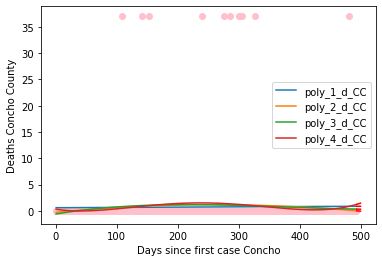

In [188]:
plt.scatter(deaths_CC.Number_days_Day1,deaths_CC.new_deaths,color='pink')
poly1_d_CC=smf.ols(formula='new_deaths ~ 1+Number_days_Day1',data=deaths_CC).fit()

plt.plot(deaths_CC.Number_days_Day1,poly1_d_CC.predict(deaths_CC.Number_days_Day1),label='poly_1_d_CC')
plt.plot(x_new_deaths_CC.Number_days_Day1,poly1_d_CC.predict(x_new_deaths_CC.Number_days_Day1),color='red')

poly2_d_CC=smf.ols(formula='new_deaths ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)',data=deaths_CC).fit()

plt.plot(deaths_CC.Number_days_Day1,poly2_d_CC.predict(deaths_CC.Number_days_Day1),label='poly_2_d_CC')
plt.plot(x_new_deaths_CC.Number_days_Day1,poly2_d_CC.predict(x_new_deaths_CC.Number_days_Day1),color='red')

poly3_d_CC=smf.ols(formula='new_deaths ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)+I(Number_days_Day1**3.0)',data=deaths_CC).fit()

plt.plot(deaths_CC.Number_days_Day1,poly3_d_CC.predict(deaths_CC.Number_days_Day1),label='poly_3_d_CC')
plt.plot(x_new_deaths_CC.Number_days_Day1,poly3_d_CC.predict(x_new_deaths_CC.Number_days_Day1),color='red')

poly4_d_CC=smf.ols(formula='new_deaths ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)+I(Number_days_Day1**3.0)+I(Number_days_Day1**4.0)',data=deaths_CC).fit()

plt.plot(deaths_CC.Number_days_Day1,poly4_d_CC.predict(deaths_CC.Number_days_Day1),label='poly_4_d_CC')
plt.plot(x_new_deaths_CC.Number_days_Day1,poly4_d_CC.predict(x_new_deaths_CC.Number_days_Day1),color='red')

plt.xlabel('Days since first case Concho')
plt.ylabel('Deaths Concho County')
plt.legend()


In [189]:
print('poly1_d_CC_rsquared',poly1_d_CC.rsquared)
print('poly2_d_CC_rsquared',poly2_d_CC.rsquared)
print('poly3_d_CC_rsquared',poly3_d_CC.rsquared)
print('poly4_d_CC_rsquared',poly4_d_CC.rsquared)
print('poly1_d_CC_pvalues',poly1_d_CC.pvalues)
print('poly2_d_CC_pvalues',poly2_d_CC.pvalues)
print('poly3_d_CC_pvalues',poly3_d_CC.pvalues)
print('poly4_d_CC_pvalues',poly4_d_CC.pvalues)

poly1_d_CC_rsquared 0.00022528341829575194
poly2_d_CC_rsquared 0.005761487156977552
poly3_d_CC_rsquared 0.006305523108779076
poly4_d_CC_rsquared 0.009611160345062153
poly1_d_CC_pvalues Intercept           0.192831
Number_days_Day1    0.739816
dtype: float64
poly2_d_CC_pvalues Intercept                     0.716204
Number_days_Day1              0.093405
I(Number_days_Day1 ** 2.0)    0.099561
dtype: float64
poly3_d_CC_pvalues Intercept                     0.538786
Number_days_Day1              0.253157
I(Number_days_Day1 ** 2.0)    0.433447
I(Number_days_Day1 ** 3.0)    0.605468
dtype: float64
poly4_d_CC_pvalues Intercept                     0.778793
Number_days_Day1              0.592913
I(Number_days_Day1 ** 2.0)    0.318525
I(Number_days_Day1 ** 3.0)    0.230545
I(Number_days_Day1 ** 4.0)    0.202939
dtype: float64


In [190]:
print('poly1_d_CC_rmse',m.rmse(deaths_CC.new_deaths,poly1_d_CC.predict(deaths_CC.Number_days_Day1)))
print('poly2_d_CC_rmse',m.rmse(deaths_CC.new_deaths,poly2_d_CC.predict(deaths_CC.Number_days_Day1)))
print('poly3_d_CC_rmse',m.rmse(deaths_CC.new_deaths,poly3_d_CC.predict(deaths_CC.Number_days_Day1)))
print('poly4_d_CC_rmse',m.rmse(deaths_CC.new_deaths,poly4_d_CC.predict(deaths_CC.Number_days_Day1)))

poly1_d_CC_rmse 5.220489363383054
poly2_d_CC_rmse 5.2060151954317115
poly3_d_CC_rmse 5.204590664523692
poly4_d_CC_rmse 5.195926622849274


In [191]:
poly1_d_CC.conf_int()

,0,1
Intercept,-0.312147,1.544194
Number_days_Day1,-0.002711,0.003814


In [192]:
poly2_d_CC.conf_int()

,0,1
Intercept,-1.651316,1.135411
Number_days_Day1,-0.001886,0.024219
I(Number_days_Day1 ** 2.0),-0.000047,0.000004


In [193]:
poly3_d_CC.conf_int()

,0,1
Intercept,-2.449975e+00,1.281768e+00
Number_days_Day1,-1.367790e-02,5.180902e-02
I(Number_days_Day1 ** 2.0),-2.157971e-04,9.270650e-05
I(Number_days_Day1 ** 3.0),-1.515744e-07,2.597926e-07


In [194]:
poly4_d_CC.conf_int()

,0,1
Intercept,-2.006673e+00,2.676553e+00
Number_days_Day1,-8.355273e-02,4.779139e-02
I(Number_days_Day1 ** 2.0),-2.660334e-04,8.158209e-04
I(Number_days_Day1 ** 3.0),-2.654499e-06,6.410345e-07
I(Number_days_Day1 ** 4.0),-5.822050e-10,2.734013e-09


For concho county poly2_d_CC model is best fit<br/>
Confidence interval for Concho deaths

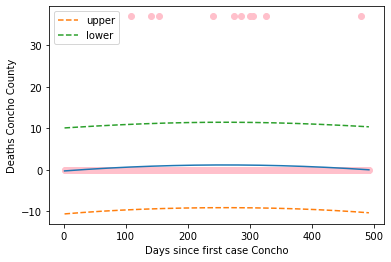

In [252]:
_,upper,lower=wls_prediction_std(poly2_d_CC)
plt.scatter(deaths_CC.Number_days_Day1,deaths_CC.new_deaths,color='pink')
plt.plot(deaths_CC.Number_days_Day1,poly2_d_CC.predict(deaths_CC.Number_days_Day1))
plt.plot(deaths_CC.Number_days_Day1,upper,'--',label='upper')
plt.plot(deaths_CC.Number_days_Day1,lower,'--',label='lower')
plt.xlabel('Days since first case Concho')
plt.ylabel('Deaths Concho County')
plt.legend()

Hansford County

In [196]:
texas_county_H=texas_county[texas_county['County Name']=='Hansford County ']
texas_county_H

,Date,countyFIPS,State,County Name,StateFIPS,population,Deaths,Cases
1501260,2020-01-22,48195,TX,Hansford County,48,5399,0,0
1501261,2020-01-23,48195,TX,Hansford County,48,5399,0,0
1501262,2020-01-24,48195,TX,Hansford County,48,5399,0,0
1501263,2020-01-25,48195,TX,Hansford County,48,5399,0,0
1501264,2020-01-26,48195,TX,Hansford County,48,5399,0,0
...,...,...,...,...,...,...,...,...
1501828,2021-08-12,48195,TX,Hansford County,48,5399,24,960
1501829,2021-08-13,48195,TX,Hansford County,48,5399,24,960
1501830,2021-08-14,48195,TX,Hansford County,48,5399,24,968
1501831,2021-08-15,48195,TX,Hansford County,48,5399,24,968


Removing data till first case

In [197]:
texas_county_H=texas_county_H[texas_county_H['Cases']>0]
texas_county_H['new_cases']=texas_county_H['Cases'].diff()
texas_county_H['new_deaths']=texas_county_H['Deaths'].diff()
texas_county_H

<ipython-input-197-855fc5391f04>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_county_H['new_cases']=texas_county_H['Cases'].diff()
<ipython-input-197-855fc5391f04>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_county_H['new_deaths']=texas_county_H['Deaths'].diff()


,Date,countyFIPS,State,County Name,StateFIPS,population,Deaths,Cases,new_cases,new_deaths
1501335,2020-04-06,48195,TX,Hansford County,48,5399,0,1,NaN,NaN
1501336,2020-04-07,48195,TX,Hansford County,48,5399,0,1,0.0,0.0
1501337,2020-04-08,48195,TX,Hansford County,48,5399,0,1,0.0,0.0
1501338,2020-04-09,48195,TX,Hansford County,48,5399,0,1,0.0,0.0
1501339,2020-04-10,48195,TX,Hansford County,48,5399,0,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1501828,2021-08-12,48195,TX,Hansford County,48,5399,24,960,-1.0,0.0
1501829,2021-08-13,48195,TX,Hansford County,48,5399,24,960,0.0,0.0
1501830,2021-08-14,48195,TX,Hansford County,48,5399,24,968,8.0,0.0
1501831,2021-08-15,48195,TX,Hansford County,48,5399,24,968,0.0,0.0


In [198]:
#normalizing to 100000
texas_county_H['new_cases']=round((texas_county_H['new_cases']/texas_county_H['population'])*100000,0)
texas_county_H['new_deaths']=round((texas_county_H['new_deaths']/texas_county_H['population'])*100000,0)
texas_county_H

<ipython-input-198-51484321566c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_county_H['new_cases']=round((texas_county_H['new_cases']/texas_county_H['population'])*100000,0)
<ipython-input-198-51484321566c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_county_H['new_deaths']=round((texas_county_H['new_deaths']/texas_county_H['population'])*100000,0)


,Date,countyFIPS,State,County Name,StateFIPS,population,Deaths,Cases,new_cases,new_deaths
1501335,2020-04-06,48195,TX,Hansford County,48,5399,0,1,NaN,NaN
1501336,2020-04-07,48195,TX,Hansford County,48,5399,0,1,0.0,0.0
1501337,2020-04-08,48195,TX,Hansford County,48,5399,0,1,0.0,0.0
1501338,2020-04-09,48195,TX,Hansford County,48,5399,0,1,0.0,0.0
1501339,2020-04-10,48195,TX,Hansford County,48,5399,0,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1501828,2021-08-12,48195,TX,Hansford County,48,5399,24,960,-19.0,0.0
1501829,2021-08-13,48195,TX,Hansford County,48,5399,24,960,0.0,0.0
1501830,2021-08-14,48195,TX,Hansford County,48,5399,24,968,148.0,0.0
1501831,2021-08-15,48195,TX,Hansford County,48,5399,24,968,0.0,0.0


Removing first date 2020-04-06

In [199]:
#removing outlier 
texas_county_H=texas_county_H[texas_county_H['new_cases']<2500]
texas_county_H=texas_county_H[texas_county_H['Date']!='2020-04-06']
l=[]
for i in range(0,len(texas_county_H)):
    day=i+1
    l.append(day)
texas_county_H['Number_days_Day1']=l

In [200]:
texas_county_H['new_cases'][texas_county_H['new_cases']<0]=0
texas_county_H['new_deaths'][texas_county_H['new_deaths']<0]=0

<ipython-input-200-19289df17637>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_county_H['new_cases'][texas_county_H['new_cases']<0]=0
<ipython-input-200-19289df17637>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_county_H['new_deaths'][texas_county_H['new_deaths']<0]=0


In [201]:
cases_H=texas_county_H[['new_cases','Number_days_Day1']]
lm_H = smf.ols(formula='new_cases~Number_days_Day1', data=cases_H).fit()
pred_H=lm_H.predict(cases_H.Number_days_Day1)
pred_H

1501336    21.088082
1501337    21.114340
1501338    21.140598
1501339    21.166856
1501340    21.193113
             ...    
1501828    33.954361
1501829    33.980619
1501830    34.006877
1501831    34.033135
1501832    34.059392
Length: 495, dtype: float64

In [202]:
x_new_H=pd.DataFrame({'Number_days_Day1':[496,497,498,499,500,501,502]})
pred_next_H=lm_H.predict(x_new_H.Number_days_Day1)
pred_next_H

0    34.085650
1    34.111908
2    34.138165
3    34.164423
4    34.190681
5    34.216939
6    34.243196
dtype: float64

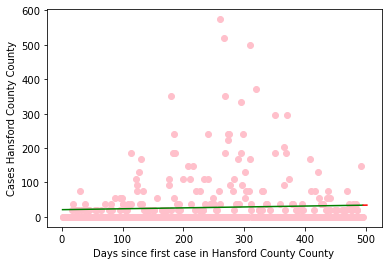

In [203]:
plt.scatter(cases_H.Number_days_Day1,cases_H.new_cases,color='pink')
plt.plot(cases_H.Number_days_Day1,pred_H,color='green')
plt.plot(x_new_H.Number_days_Day1,pred_next_H,color='red')
plt.xlabel('Days since first case in Hansford County County ')
plt.ylabel('Cases Hansford County County')
plt.show()

In [204]:
lm_H.rsquared

0.00300332796306757

In [205]:
lm_H.pvalues

Intercept           0.000690
Number_days_Day1    0.223561
dtype: float64

In [206]:
lm_H.conf_int()

,0,1
Intercept,8.944785,33.178864
Number_days_Day1,-0.016077,0.068592


In [207]:
m.rmse(cases_H.new_cases,pred_H)

68.3622030005267

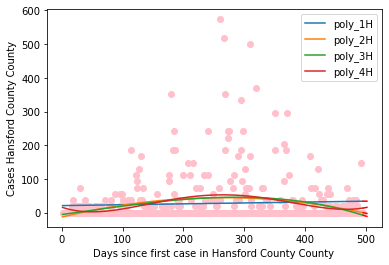

In [208]:
plt.scatter(cases_H.Number_days_Day1,cases_H.new_cases,color='pink')
poly1H=smf.ols(formula='new_cases ~ 1+Number_days_Day1',data=cases_H).fit()

plt.plot(cases_H.Number_days_Day1,poly1H.predict(cases_H.Number_days_Day1),label='poly_1H')
plt.plot(x_new_H.Number_days_Day1,poly1H.predict(x_new_H.Number_days_Day1),color='red')

poly2H=smf.ols(formula='new_cases ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)',data=cases_H).fit()

plt.plot(cases_H.Number_days_Day1,poly2H.predict(cases_H.Number_days_Day1),label='poly_2H')
plt.plot(x_new_H.Number_days_Day1,poly2H.predict(x_new_H.Number_days_Day1),color='red')

poly3H=smf.ols(formula='new_cases ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)+I(Number_days_Day1**3.0)',data=cases_H).fit()

plt.plot(cases_H.Number_days_Day1,poly3H.predict(cases_H.Number_days_Day1),label='poly_3H')
plt.plot(x_new_H.Number_days_Day1,poly3H.predict(x_new_H.Number_days_Day1),color='red')

poly4H=smf.ols(formula='new_cases ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)+I(Number_days_Day1**3.0)+I(Number_days_Day1**4.0)',data=cases_H).fit()

plt.plot(cases_H.Number_days_Day1,poly4H.predict(cases_H.Number_days_Day1),label='poly_4H')
plt.plot(x_new_H.Number_days_Day1,poly4H.predict(x_new_H.Number_days_Day1),color='red')

plt.xlabel('Days since first case in Hansford County County ')
plt.ylabel('Cases Hansford County County')
plt.legend()

In [209]:
print('poly1H_rsquared',poly1H.rsquared)
print('poly2H_rsquared',poly2H.rsquared)
print('poly3H_rsquared',poly3H.rsquared)
print('poly4H_rsquared',poly4H.rsquared)
print('poly1H_pvalues',poly1H.pvalues)
print('poly2H_pvalues',poly2H.pvalues)
print('poly3H_pvalues',poly3H.pvalues)
print('poly4H_pvalues',poly4H.pvalues)

poly1H_rsquared 0.00300332796306757
poly2H_rsquared 0.05178708101070495
poly3H_rsquared 0.05353919838465815
poly4H_rsquared 0.06404336663855859
poly1H_pvalues Intercept           0.000690
Number_days_Day1    0.223561
dtype: float64
poly2H_pvalues Intercept                     1.530094e-01
Number_days_Day1              3.184954e-07
I(Number_days_Day1 ** 2.0)    6.846477e-07
dtype: float64
poly3H_pvalues Intercept                     0.663011
Number_days_Day1              0.233270
I(Number_days_Day1 ** 2.0)    0.917751
I(Number_days_Day1 ** 3.0)    0.340861
dtype: float64
poly4H_pvalues Intercept                     0.285344
Number_days_Day1              0.151700
I(Number_days_Day1 ** 2.0)    0.023194
I(Number_days_Day1 ** 3.0)    0.014788
I(Number_days_Day1 ** 4.0)    0.019423
dtype: float64


In [210]:
print('ploy1H_rmse',m.rmse(cases_H.new_cases,poly1H.predict(cases_H.Number_days_Day1)))
print('ploy2H_rmse',m.rmse(cases_H.new_cases,poly2H.predict(cases_H.Number_days_Day1)))
print('ploy3H_rmse',m.rmse(cases_H.new_cases,poly3H.predict(cases_H.Number_days_Day1)))
print('ploy4H_rmse',m.rmse(cases_H.new_cases,poly4H.predict(cases_H.Number_days_Day1)))

ploy1H_rmse 68.3622030005267
ploy2H_rmse 66.6687218901988
ploy3H_rmse 66.60709784204066
ploy4H_rmse 66.23645161030439


In [211]:
poly1H.conf_int()

,0,1
Intercept,8.944785,33.178864
Number_days_Day1,-0.016077,0.068592


In [212]:
poly2H.conf_int()

,0,1
Intercept,-30.745711,4.830991
Number_days_Day1,0.271326,0.602578
I(Number_days_Day1 ** 2.0),-0.001151,-0.000505


In [213]:
poly3H.conf_int()

,0,1
Intercept,-29.087063,18.521836
Number_days_Day1,-0.163007,0.667415
I(Number_days_Day1 ** 2.0),-0.001842,0.002046
I(Number_days_Day1 ** 3.0),-0.000004,0.000001


In [214]:
poly4H.conf_int()

,0,1
Intercept,-1.355823e+01,4.595406e+01
Number_days_Day1,-1.435646e+00,2.233410e-01
I(Number_days_Day1 ** 2.0),1.080324e-03,1.466253e-02
I(Number_days_Day1 ** 3.0),-4.616158e-05,-5.037730e-06
I(Number_days_Day1 ** 4.0),3.979853e-09,4.511151e-08


For Hansfor poly2H is best fit<br/>
Confidence interval for Hansford cases

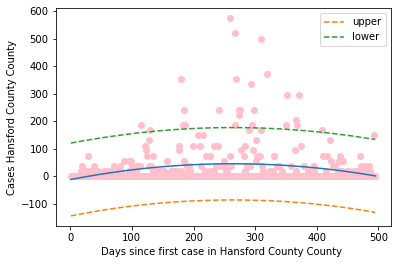

In [253]:
_,upper,lower=wls_prediction_std(poly2H)
plt.scatter(cases_H.Number_days_Day1,cases_H.new_cases,color='pink')
plt.plot(cases_H.Number_days_Day1,poly2H.predict(cases_H.Number_days_Day1))
plt.plot(cases_H.Number_days_Day1,upper,'--',label='upper')
plt.plot(cases_H.Number_days_Day1,lower,'--',label='lower')
plt.xlabel('Days since first case in Hansford County County ')
plt.ylabel('Cases Hansford County County')
plt.legend()

Deaths Hansford

In [216]:
deaths_H=texas_county_H[['new_deaths','Number_days_Day1']]
lm_d_H = smf.ols(formula='new_deaths~Number_days_Day1', data=deaths_H).fit()
pred_deaths_H=lm_d_H.predict(deaths_H.Number_days_Day1)
pred_deaths_H

1501336    0.948843
1501337    0.949034
1501338    0.949225
1501339    0.949416
1501340    0.949606
             ...   
1501828    1.042313
1501829    1.042504
1501830    1.042694
1501831    1.042885
1501832    1.043076
Length: 495, dtype: float64

In [217]:
lm_d_H.params

Intercept           0.948653
Number_days_Day1    0.000191
dtype: float64

In [218]:
x_new_deaths_H=pd.DataFrame({'Number_days_Day1':[496,497,498,499,500,501,502]})
pred_next_deaths_H=lm_d_H.predict(x_new_deaths_H.Number_days_Day1)
pred_next_deaths_H

0    1.043267
1    1.043457
2    1.043648
3    1.043839
4    1.044030
5    1.044220
6    1.044411
dtype: float64

In [219]:
lm_d_H.pvalues

Intercept           0.016985
Number_days_Day1    0.890416
dtype: float64

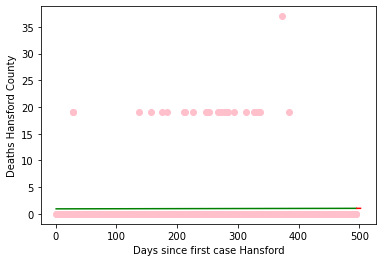

In [220]:
plt.scatter(deaths_H.Number_days_Day1,deaths_H.new_deaths,color='pink')
plt.plot(deaths_H.Number_days_Day1,pred_deaths_H,color='green')
plt.plot(x_new_deaths_H.Number_days_Day1,pred_next_deaths_H,color='red')
plt.xlabel('Days since first case Hansford')
plt.ylabel('Deaths Hansford County')
plt.show()

In [221]:
m.rmse(deaths_H.new_deaths,pred_deaths_H)

4.390445122461084

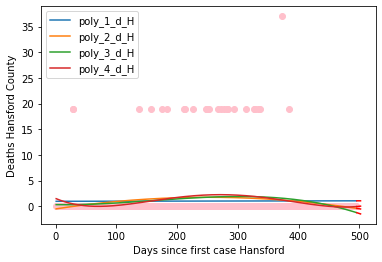

In [222]:
plt.scatter(deaths_H.Number_days_Day1,deaths_H.new_deaths,color='pink')
poly1_d_H=smf.ols(formula='new_deaths ~ 1+Number_days_Day1',data=deaths_H).fit()

plt.plot(deaths_H.Number_days_Day1,poly1_d_H.predict(deaths_H.Number_days_Day1),label='poly_1_d_H')
plt.plot(x_new_deaths_H.Number_days_Day1,poly1_d_H.predict(x_new_deaths_H.Number_days_Day1),color='red')

poly2_d_H=smf.ols(formula='new_deaths ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)',data=deaths_H).fit()

plt.plot(deaths_H.Number_days_Day1,poly2_d_H.predict(deaths_H.Number_days_Day1),label='poly_2_d_H')
plt.plot(x_new_deaths_H.Number_days_Day1,poly2_d_H.predict(x_new_deaths_H.Number_days_Day1),color='red')

poly3_d_H=smf.ols(formula='new_deaths ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)+I(Number_days_Day1**3.0)',data=deaths_H).fit()

plt.plot(deaths_H.Number_days_Day1,poly3_d_H.predict(deaths_H.Number_days_Day1),label='poly_3_d_H')
plt.plot(x_new_deaths_H.Number_days_Day1,poly3_d_H.predict(x_new_deaths_H.Number_days_Day1),color='red')

poly4_d_H=smf.ols(formula='new_deaths ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)+I(Number_days_Day1**3.0)+I(Number_days_Day1**4.0)',data=deaths_H).fit()

plt.plot(deaths_H.Number_days_Day1,poly4_d_H.predict(deaths_H.Number_days_Day1),label='poly_4_d_H')
plt.plot(x_new_deaths_H.Number_days_Day1,poly4_d_H.predict(x_new_deaths_H.Number_days_Day1),color='red')

plt.xlabel('Days since first case Hansford')
plt.ylabel('Deaths Hansford County')
plt.legend()

In [223]:
print('poly1_d_H_rsquared',poly1_d_H.rsquared)
print('poly2_d_H_rsquared',poly2_d_H.rsquared)
print('poly3_d_H_rsquared',poly3_d_H.rsquared)
print('poly4_d_H_rsquared',poly4_d_H.rsquared)
print('poly1_d_H_pvalues',poly1_d_H.pvalues)
print('poly2_d_H_pvalues',poly2_d_H.pvalues)
print('poly3_d_H_pvalues',poly3_d_H.pvalues)
print('poly4_d_H_pvalues',poly4_d_H.pvalues)

poly1_d_H_rsquared 3.8542726778612035e-05
poly2_d_H_rsquared 0.022619047073713427
poly3_d_H_rsquared 0.027675424449121966
poly4_d_H_rsquared 0.035745622140919475
poly1_d_H_pvalues Intercept           0.016985
Number_days_Day1    0.890416
dtype: float64
poly2_d_H_pvalues Intercept                     0.364002
Number_days_Day1              0.001039
I(Number_days_Day1 ** 2.0)    0.000807
dtype: float64
poly3_d_H_pvalues Intercept                     0.702919
Number_days_Day1              0.883296
I(Number_days_Day1 ** 2.0)    0.311093
I(Number_days_Day1 ** 3.0)    0.110704
dtype: float64
poly4_d_H_pvalues Intercept                     0.126736
Number_days_Day1              0.067978
I(Number_days_Day1 ** 2.0)    0.026133
I(Number_days_Day1 ** 3.0)    0.027620
I(Number_days_Day1 ** 4.0)    0.043400
dtype: float64


In [224]:
print('poly1_d_H_rmse',m.rmse(deaths_H.new_deaths,poly1_d_H.predict(deaths_H.Number_days_Day1)))
print('poly2_d_H_rmse',m.rmse(deaths_H.new_deaths,poly2_d_H.predict(deaths_H.Number_days_Day1)))
print('poly3_d_H_rmse',m.rmse(deaths_H.new_deaths,poly3_d_H.predict(deaths_H.Number_days_Day1)))
print('poly4_d_H_rmse',m.rmse(deaths_H.new_deaths,poly4_d_H.predict(deaths_H.Number_days_Day1)))

poly1_d_H_rmse 4.390445122461084
poly2_d_H_rmse 4.34059092816242
poly3_d_H_rmse 4.329348574120449
poly4_d_H_rmse 4.311344556164965


In [225]:
poly1_d_H.conf_int()

,0,1
Intercept,0.170456,1.726849
Number_days_Day1,-0.002528,0.002910


In [226]:
poly2_d_H.conf_int()

,0,1
Intercept,-1.693720,0.622567
Number_days_Day1,0.007326,0.028892
I(Number_days_Day1 ** 2.0),-0.000057,-0.000015


In [227]:
poly3_d_H.conf_int()

,0,1
Intercept,-1.246741e+00,1.847757e+00
Number_days_Day1,-2.900536e-02,2.497066e-02
I(Number_days_Day1 ** 2.0),-6.115424e-05,1.915853e-04
I(Number_days_Day1 ** 3.0),-3.036967e-07,3.127454e-08


In [228]:
poly4_d_H.conf_int()

,0,1
Intercept,-4.289180e-01,3.444749e+00
Number_days_Day1,-1.042570e-01,3.726835e-03
I(Number_days_Day1 ** 2.0),5.988278e-05,9.439513e-04
I(Number_days_Day1 ** 3.0),-2.843252e-06,-1.664918e-07
I(Number_days_Day1 ** 4.0),4.106400e-11,2.718332e-09


For Hansfor linear model is best fit<br/>
Confidence interval for Hansford deaths

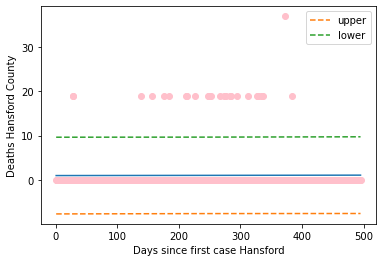

In [254]:
_,upper,lower=wls_prediction_std(poly1_d_H)
plt.scatter(deaths_H.Number_days_Day1,deaths_H.new_deaths,color='pink')
plt.plot(deaths_H.Number_days_Day1,poly1_d_H.predict(deaths_H.Number_days_Day1))
plt.plot(deaths_H.Number_days_Day1,upper,'--',label='upper')
plt.plot(deaths_H.Number_days_Day1,lower,'--',label='lower')
plt.xlabel('Days since first case Hansford')
plt.ylabel('Deaths Hansford County')
plt.legend()

From my observation after normalizing the values Dimmit county is at high risk when compared to other counties.RMSE for this 148.3 and we can observe linear model fits better as R^2 for non-linear is similar.Comming to deaths RMSE is 3.3 in this county.

Hospital Beds 

Predicted number of cases for next week in state of texas by linear model 


In [230]:
pred_next

0    8032.480603
1    8040.229900
2    8047.979198
3    8055.728495
4    8063.477793
5    8071.227091
6    8078.976388
dtype: float64

Predicted number of deaths for next week in state of texas by linear model

In [243]:
pred_next_deaths

0    117.185432
1    117.247955
2    117.310478
3    117.373001
4    117.435524
5    117.498047
6    117.560571
dtype: float64

In [232]:
Texas_hosp=Hosp[Hosp['state']=='TX']
total_beds=Texas_hosp['total_staffed_adult_icu_beds']
total_beds

20    6857
Name: total_staffed_adult_icu_beds, dtype: int64

Form the above predctions of deaths for next week in the state of texas is about 120 per day which is relatively low when compared with the number of ICU beds available that is 6857.<br/>
We can clearly observe that we won't go into point of no return in coming weeks for the state of Texas.